Desarrollo del proyecto: Expansión Estratégica de Biogenesys con Python

Avance 1: Carga y transformación de los datos

El propósito principal de este primer avance es preparar los datos para un análisis más profundo, asegurándose de que los datos estén limpios y listos para su uso, eliminando valores nulos, seleccionando las columnas adecuadas y filtrando los datos por países y fechas relevantes.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_latinoamerica = 'C:/Users/Enzo/OneDrive/Escritorio/Phyton Henry/PI_M4/data_latinoamerica.csv'
df = pd.read_csv(data_latinoamerica, low_memory=True)

In [3]:
df.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [5]:
df.dtypes

location_key                              object
date                                      object
country_code                              object
country_name                              object
new_confirmed                            float64
new_deceased                             float64
cumulative_confirmed                     float64
cumulative_deceased                      float64
cumulative_vaccine_doses_administered    float64
population                               float64
population_male                          float64
population_female                        float64
population_rural                         float64
population_urban                         float64
population_density                       float64
human_development_index                  float64
population_age_00_09                     float64
population_age_10_19                     float64
population_age_20_29                     float64
population_age_30_39                     float64
population_age_40_49

In [6]:
filas, columnas = df.shape
filas_esperadas = 12216057
columnas_esperadas = 50

print(f'Filas = {filas}, Columnas = {columnas}')

if (filas,columnas) == (filas_esperadas,columnas_esperadas):
    print('El Dataset tiene las dimensiones indicadas')
else: print('El Dataset no tiene las demensiones indicadas')

Filas = 12216057, Columnas = 50
El Dataset tiene las dimensiones indicadas


In [7]:
keys = ['AR', 'CL', 'CO', 'CH', 'MX', 'BR', 'PE']
df_fillcountry = df[df['location_key'].isin(keys)]
df_fillcountry

location_key        date country_code country_name  new_confirmed  \
0                  AR  2020-01-01           AR    Argentina            3.0   
1                  AR  2020-01-02           AR    Argentina           14.0   
2                  AR  2020-01-03           AR    Argentina            3.0   
3                  AR  2020-01-04           AR    Argentina            7.0   
4                  AR  2020-01-05           AR    Argentina            5.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            NaN   
10253874           PE  2022-09-15           PE         Peru            NaN   
10253875           PE  2022-09-16           PE         Peru            NaN   
10253876           PE  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
0                  0.0                   3.0                  0.0   
1                  0.0                  17.0                  0.0   
2                  0.0                  20.0                  0.0   
3                  0.0                  27.0                  0.0   
4                  0.0                  32.0                  0.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
0                                           NaN  44938712.0  ...   
1                                           NaN  44938712.0  ...   
2                                           NaN  44938712.0  ...   
3                                           NaN  44938712.0  ...   
4                                           NaN  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                      15057273.0         2690269.0           55032.0   
1                      15057273.0         2690269.0           55032.0   
2                      15057273.0         2690269.0           55032.0   
3                      15057273.0         2690269.0           55032.0   
4                      15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
0                  76.520                    147.086   
1                  76.520                    147.086   
2                  76.520                    147.086   
3                  76.520                    147.086   
4                  76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    

In [8]:
df_filldate = df_fillcountry[df_fillcountry['date']  > '2021-01-01']
df_filldate

location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina         7767.0   
368                AR  2021-01-03           AR    Argentina         4934.0   
369                AR  2021-01-04           AR    Argentina        13953.0   
370                AR  2021-01-05           AR    Argentina        14085.0   
371                AR  2021-01-06           AR    Argentina        14496.0   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru         1150.0   
10253873           PE  2022-09-14           PE         Peru            NaN   
10253874           PE  2022-09-15           PE         Peru            NaN   
10253875           PE  2022-09-16           PE         Peru            NaN   
10253876           PE  2022-09-17           PE         Peru            NaN   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367              166.0             1670634.0              46688.0   
368              157.0             1675568.0              46845.0   
369              157.0             1689521.0              47002.0   
370              160.0             1703606.0              47162.0   
371              131.0             1718102.0              47293.0   
...                ...                   ...                  ...   
10253872          22.0             4127612.0             216173.0   
10253873           NaN                   NaN                  NaN   
10253874           NaN                   NaN                  NaN   
10253875           NaN                   NaN                  NaN   
10253876           NaN                   NaN                  NaN   

          cumulative_vaccine_doses_administered  population  ...  \
367                                     20334.0  44938712.0  ...   
368                                     20529.0  44938712.0  ...   
369                                     25164.0  44938712.0  ...   
370                                     29852.0  44938712.0  ...   
371                                     34162.0  44938712.0  ...   
...                                         ...         ...  ...   
10253872                                    NaN  29381884.0  ...   
10253873                                    NaN  29381884.0  ...   
10253874                                    NaN  29381884.0  ...   
10253875                                    NaN  29381884.0  ...   
10253876                                    NaN  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
371                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
371                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    

In [9]:
df_filldate.isnull().sum()

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

In [10]:
df_filldate = df_filldate.copy()
colnum = df_filldate.select_dtypes(include=['float64', 'int64']).columns

for col in colnum:
    df_filldate.loc[:, col] = df_filldate.groupby('country_name')[col].transform(lambda x: x.fillna(x.mean()))

df_filldate

location_key        date country_code country_name  new_confirmed  \
367                AR  2021-01-02           AR    Argentina    7767.000000   
368                AR  2021-01-03           AR    Argentina    4934.000000   
369                AR  2021-01-04           AR    Argentina   13953.000000   
370                AR  2021-01-05           AR    Argentina   14085.000000   
371                AR  2021-01-06           AR    Argentina   14496.000000   
...               ...         ...          ...          ...            ...   
10253872           PE  2022-09-13           PE         Peru    1150.000000   
10253873           PE  2022-09-14           PE         Peru    5032.183871   
10253874           PE  2022-09-15           PE         Peru    5032.183871   
10253875           PE  2022-09-16           PE         Peru    5032.183871   
10253876           PE  2022-09-17           PE         Peru    5032.183871   

          new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.000000          1.670634e+06         46688.000000   
368         157.000000          1.675568e+06         46845.000000   
369         157.000000          1.689521e+06         47002.000000   
370         160.000000          1.703606e+06         47162.000000   
371         131.000000          1.718102e+06         47293.000000   
...                ...                   ...                  ...   
10253872     22.000000          4.127612e+06        216173.000000   
10253873    197.233871          2.576906e+06        188954.366129   
10253874    197.233871          2.576906e+06        188954.366129   
10253875    197.233871          2.576906e+06        188954.366129   
10253876    197.233871          2.576906e+06        188954.366129   

          cumulative_vaccine_doses_administered  population  ...  \
367                                2.033400e+04  44938712.0  ...   
368                                2.052900e+04  44938712.0  ...   
369                                2.516400e+04  44938712.0  ...   
370                                2.985200e+04  44938712.0  ...   
371                                3.416200e+04  44938712.0  ...   
...                                         ...         ...  ...   
10253872                           4.087166e+07  29381884.0  ...   
10253873                           4.087166e+07  29381884.0  ...   
10253874                           4.087166e+07  29381884.0  ...   
10253875                           4.087166e+07  29381884.0  ...   
10253876                           4.087166e+07  29381884.0  ...   

          population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367                    15057273.0         2690269.0           55032.0   
368                    15057273.0         2690269.0           55032.0   
369                    15057273.0         2690269.0           55032.0   
370                    15057273.0         2690269.0           55032.0   
371                    15057273.0         2690269.0           55032.0   
...                           ...               ...               ...   
10253872               10554712.0         1256339.0           16425.0   
10253873               10554712.0         1256339.0           16425.0   
10253874               10554712.0         1256339.0           16425.0   
10253875               10554712.0         1256339.0           16425.0   
10253876               10554712.0         1256339.0           16425.0   

          life_expectancy  adult_male_mortality_rate  \
367                76.520                    147.086   
368                76.520                    147.086   
369                76.520                    147.086   
370                76.520                    147.086   
371                76.520                    147.086   
...                   ...                        ...   
10253872           76.516                    146.370   
10253873           76.516                    146.370   
10253874           76.516                    

In [11]:
df_limpio = df_filldate.drop(columns=['new_recovered', 'cumulative_recovered'])

In [12]:
df_limpio.isnull().sum()

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [13]:
##df_nuevo = df_limpio.to_csv('DatosFinalesFiltrado', index=False)

In [14]:
for i in df_limpio.columns:
    print (i)
    print (df_limpio[i].describe())
    print('-------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
-------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      1144

In [15]:
for i in df_limpio.columns:
    print (i)
    print (df_limpio[i].describe())
    print('-------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
-------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      1144

In [16]:
i=0
while i < len(df_limpio.columns):
    columna = df_limpio.columns[i]
    print(columna)
    print(df_limpio[columna].describe())
    print('-------------------------')
    i += 1

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
-------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%         26.000000
50%        100.500000
75%        312.000000
max      1144

In [17]:
def calcular_estadisticas(df_limpio):
    estadisticas = {}
    
    for columna in df_limpio.select_dtypes(include='number').columns:
        mediana = df_limpio[columna].median()
        varianza = df_limpio[columna].var()
        rango = df_limpio[columna].max() - df_limpio[columna].min()
        
        estadisticas[columna] = {
            'mediana': mediana,
            'varianza': varianza,
            'rango': rango
        }
    
    return estadisticas

resultado_estadisticas = calcular_estadisticas(df_limpio)
print(resultado_estadisticas)

{'new_confirmed': {'mediana': np.float64(5214.0), 'varianza': np.float64(586577465.58212), 'rango': np.float64(298981.0)}, 'new_deceased': {'mediana': np.float64(100.5), 'varianza': np.float64(257292.4462981465), 'rango': np.float64(11447.0)}, 'cumulative_confirmed': {'mediana': np.float64(3632143.5), 'varianza': np.float64(63828420109841.22), 'rango': np.float64(34567862.0)}, 'cumulative_deceased': {'mediana': np.float64(139614.0), 'varianza': np.float64(33415397832.126804), 'rango': np.float64(685202.0)}, 'cumulative_vaccine_doses_administered': {'mediana': np.float64(40871660.99139415), 'varianza': np.float64(7991460068225012.0), 'rango': np.float64(347868463.0)}, 'population': {'mediana': np.float64(47910798.0), 'varianza': np.float64(4507478439615793.0), 'rango': np.float64(194985406.0)}, 'population_male': {'mediana': np.float64(22254165.0), 'varianza': np.float64(1101239940970119.2), 'rango': np.float64(95463769.0)}, 'population_female': {'mediana': np.float64(23245825.0), 'vari

In [18]:
df_limpio.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.908931    276.887411          6.777074e+06        192957.902075   
std     24219.361378    507.240028          7.989269e+06        182798.790565   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59255.750000   
50%      5214.000000    100.500000          3.632144e+06        139614.000000   
75%     14834.000000    312.000000          6.223497e+06        214939.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            7.464055e+07  7.772147e+07     3.787035e+07   
std                             8.939497e+07  6.713776e+07     3.318494e+07   
min                             1.800000e+01  1.757400e+07     8.972014e+06   
25%                             2.099960e+07  2.938188e+07     1.445076e+07   
50%                             4.087166e+07  4.791080e+07     2.225416e+07   
75%                             8.082964e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       rainfall_mm  relative_humidity  population_largest_city  \
count  3744.000000        3744.000000             3.744000e+03   
mean      1.459348          62.313698             1.443888e+07   
std       4.295700          15.797722             5.710077e+06   
min       0.000000          10.296407             6.723516e+06   
25%       0.000000          51.969374             1.055471e+07   
50%       0.000000          65.230404             1.291832e+07   
75%       0.454010          74.365927             2.167191e+07   
max      46.736000          94.817706             2.184651e+07   

       area_rural_sq_km  area_urban_sq_km  life_expectancy  \
count      3.744000e+03       3744.000000      3744.000000   
mean       2.636580e+06      59502.500000        76.808500   
std        2.584740e+06      45125.320206         1.597394   
min        7.094180e+05      12027.000000        74.992000   
25%        1.090598e+06      16425.000000        75.672000   
50%        1.543881e+06      45582.000000        76.518000   
75%        2.690269e+06     102418.000000        77.109000   
max        8.241430e+06     134981.000000        80.042000   

       adult_male_mortality_rate  adult_female_mortality_rate  \
count                3744.000000                  3744.000000   
mean                  154.274667                    81.428000   
std                    27.000146                    11.800623   
min                   107.669000                    59.035000   
25%                   146.370000                    77.999000   
50%                   149.351000                    82.149000   
75%                   184.379000                    91.421000   
max                   188.528000                    95.815000   

       pollution_mortality_rate  comorbidity_mortality_rate  
count               3744.000000                 3744.000000  
mean                  36.566667                   14.816667  
std              

In [19]:
df_limpio.columns

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

Avance 2: Análisis Exploratorio – Visualización

El objetivo de este análisis fue realizar visualizaciones claras y detalladas, que nos permitan descubrir patrones, tendencias y anomalías en nuestros datos para extraer insights valiosos que nos orienten en la planificación estratégica de la expansión de laboratorios farmacéuticos.

Graficos Generales:

Se comenzó por importar las librerías a utilizar en esta segunda etapa: matplotlib y seaborn, para luego,  generar visualizaciones de variables numéricas del dataset que faciliten el análisis y comparación de datos:

a. Gráficos de Barras por País: Este código muestra gráficos de barras de cada variable numérica para cada país, permitiendo comparar valores de cada métrica entre países.

b. Matriz de Correlación Filtrada: Calcula la matriz de correlación de las variables numéricas y muestra solo correlaciones fuertes (valores > 0.5 o < -0.5), ayudando a identificar relaciones significativas entre variables.

c. Histogramas de Variables con Variabilidad: Genera histogramas de las variables numéricas que tienen más de un valor único, mostrando la distribución de cada variable con una línea de densidad.

Estas visualizaciones facilitan el análisis exploratorio al destacar diferencias entre países, correlaciones fuertes, y distribuciones de las variables numéricas, proporcionando una visión general del comportamiento de los datos.

In [20]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\780966242.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_ordenado, x='country_name', y=col, ax=axes[i], ci=None, palette='deep')
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\780966242.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ordenado, x='country_name', y=col, ax=axes[i], ci=None, palette='deep')
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\780966242.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_ordenado, x='country_name', y=col, ax=axes[i], ci=None, palette='deep')
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\780966242.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

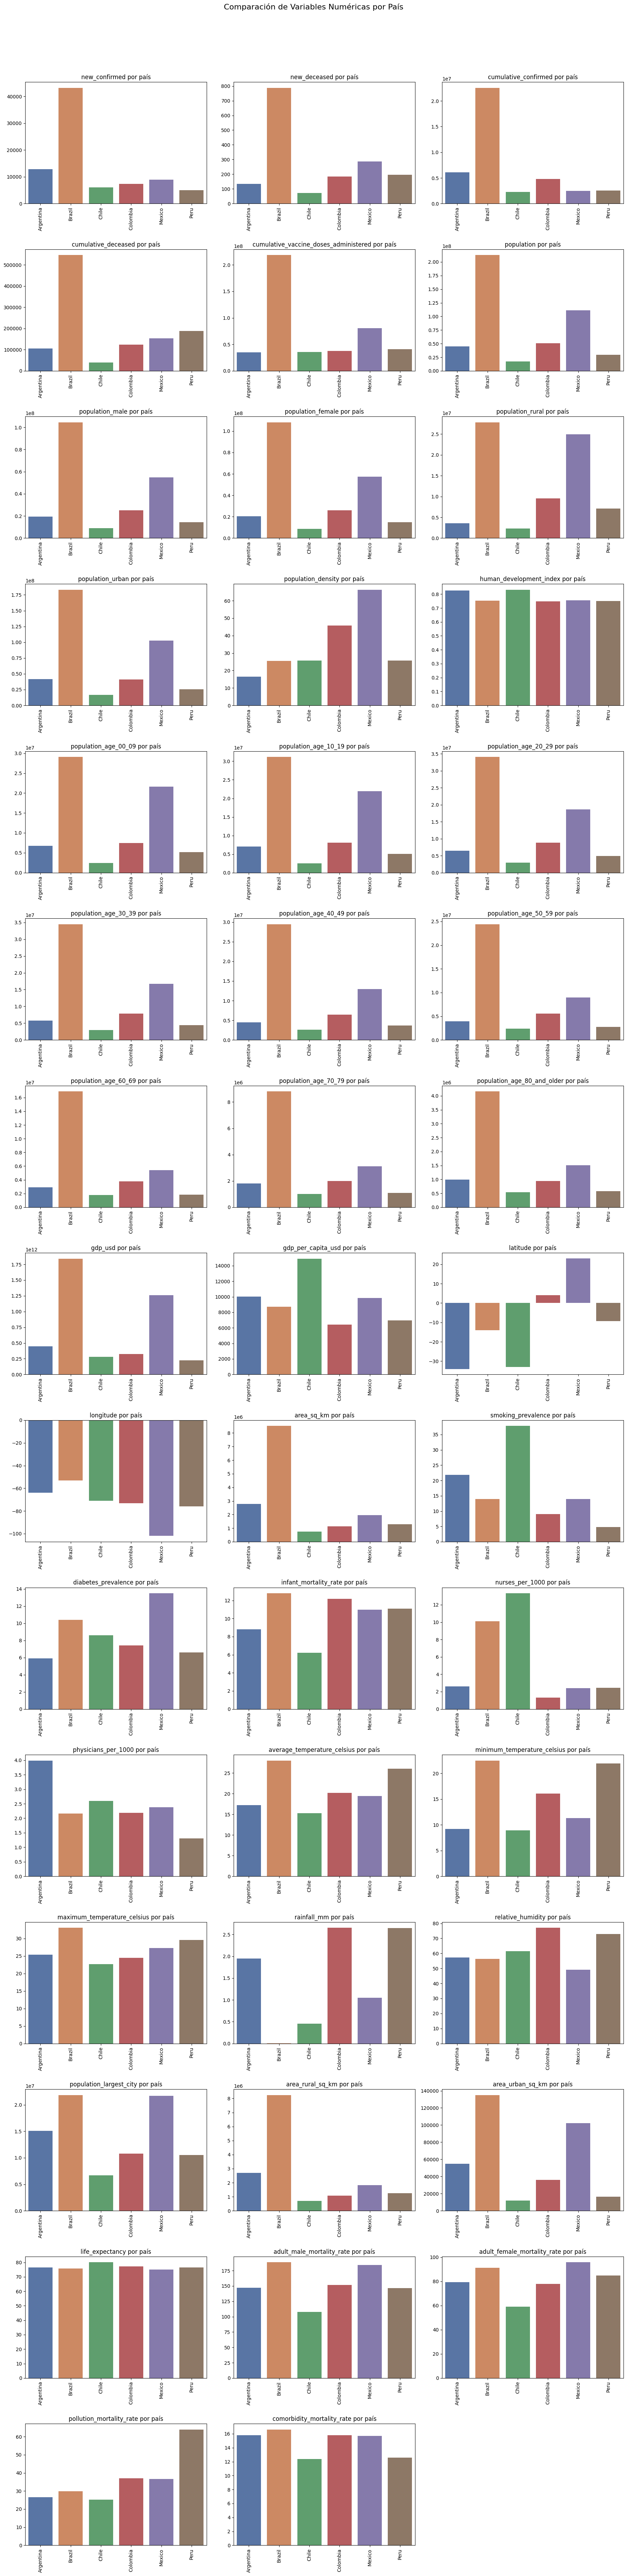

In [21]:
#1. GRÁFICOS DE BARRAS DE PAÍSES CONTRA EL RESTO DE VARIABLES

columnas_numericas = df_limpio.select_dtypes(include='number').columns.tolist()

num_cols = 3
num_rows = (len(columnas_numericas) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 5))
fig.suptitle("Comparación de Variables Numéricas por País", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    df_ordenado = df_limpio.sort_values(by='country_name')
    sns.barplot(data=df_ordenado, x='country_name', y=col, ax=axes[i], ci=None, palette='deep')
    axes[i].set_title(f'{col} por país', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

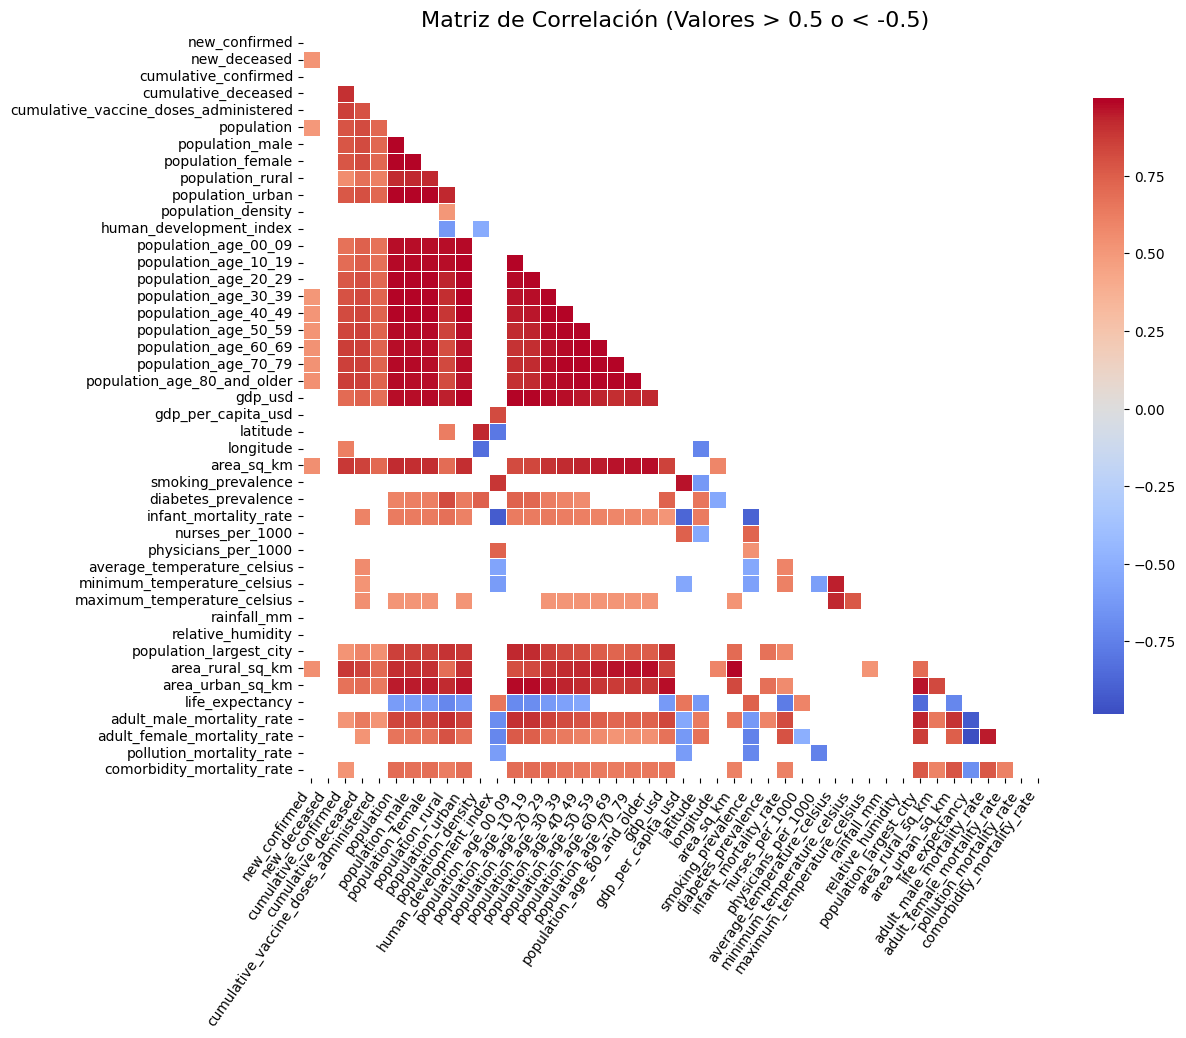

In [22]:
#2. MATRIZ DE CORRELACIÓN CON BMÁSCARA Y FILTRO > 0.5 | < -0.5
df_numerico = df_limpio.select_dtypes(include='number')
corr_matrix = df_numerico.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix = corr_matrix[abs(corr_matrix) > 0.5]

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", annot=False, center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación (Valores > 0.5 o < -0.5)', fontsize=16)
plt.xticks(rotation=55, ha='right')
plt.yticks(rotation=0)
plt.show()

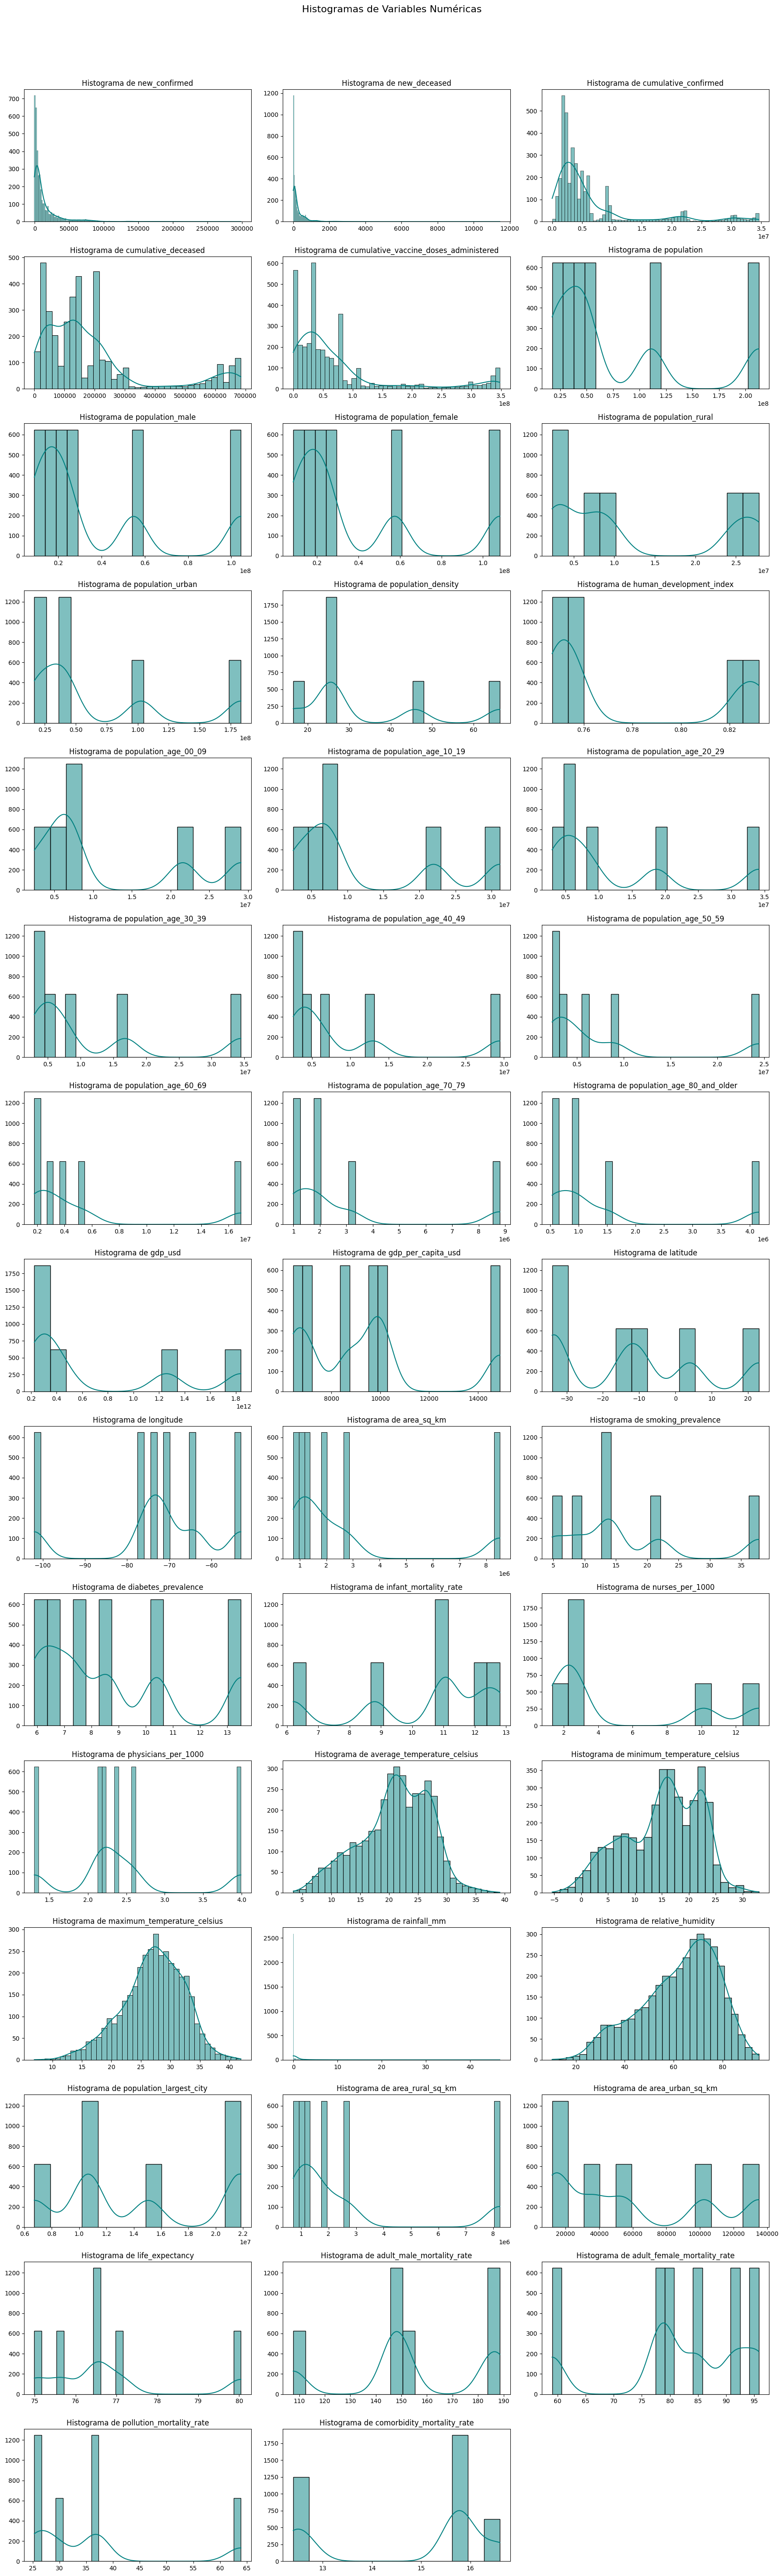

In [23]:
#3. Histogramas de variables que sí tienen cambios de valores HISTOGRAMAS DE VARIABLES QUE SÍ TIENEN CAMBIOS DE VARIABLES

columnas_numericas = [col for col in df_limpio.select_dtypes(include='number').columns if df_limpio[col].nunique() > 1]

num_cols = 3
num_rows = (len(columnas_numericas) + num_cols - 1) // num_cols  # Calcula las filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
fig.suptitle("Histogramas de Variables Numéricas", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(columnas_numericas):
    sns.histplot(df_limpio[col], kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'Histograma de {col}', fontsize=12)
    axes[i].set_xlabel('')  # Eliminar etiquetas para limpieza
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Descripcion Poblacional:

A fin de tener un panorama más preciso de las características de la población de estudio de los diferentes países se realizaron distintos gráficos de barras:

a. Gráfico de Población Total por País (en millones): Se crea un gráfico de barras que muestra la población total de cada país, convertida a millones. Se organiza la información de mayor a menor población y se visualiza con sns.barplot, personalizando las etiquetas y la rotación de los nombres de los países.

b. Distribución de la Población por Grupos de Edad (en millones): Se organiza la población de cada país por grupos de edad, transformando los datos a un formato más adecuado para la visualización. Luego, se crea un gráfico de barras con las categorías de edad en el eje X y la población en millones en el eje Y, coloreado por país.

c. Gráfico de Barras Apiladas de la Población por Grupo de Edad: Se utiliza un gráfico de barras apiladas para representar la distribución de la población en diferentes grupos de edad en los países. El gráfico muestra cómo se distribuye la población de los 6 primeros países según los grupos de edad, usando un esquema de colores magma y un tamaño grande para una mejor visualización.

d. Comparación de Tasa de Mortalidad Masculina vs. Femenina: Se compara la tasa de mortalidad masculina y femenina en países mediante un gráfico de barras apiladas. Los datos son agrupados por país y se visualiza la tasa de mortalidad de hombres y mujeres en cada uno, utilizando colores personalizados para cada sexo.

e. Prevalencia de Condiciones Preexistentes en Países con Alta y Baja Mortalidad: Se visualiza la prevalencia del tabaquismo y la diabetes en países con alta y baja tasa de mortalidad, creando dos gráficos de barras para comparar la prevalencia de estas condiciones preexistentes entre los dos grupos de países.

f. Tasa Promedio de Mortalidad por Comorbilidad por País: Se crea un gráfico de barras que muestra la tasa promedio de mortalidad relacionada con comorbilidades en diferentes países, usando una paleta de colores Spectral para una visualización más atractiva.

En resumen, los gráficos que permiten analizar y comparar diferentes aspectos demográficos y de salud entre países, como la población total, la distribución por grupos de edad, la tasa de mortalidad por sexo, la prevalencia de enfermedades y la mortalidad asociada a comorbilidades. Además, se emplean técnicas de visualización para mejorar la claridad, como la conversión de valores a millones, gráficos apilados y la personalización de colores y etiquetas.

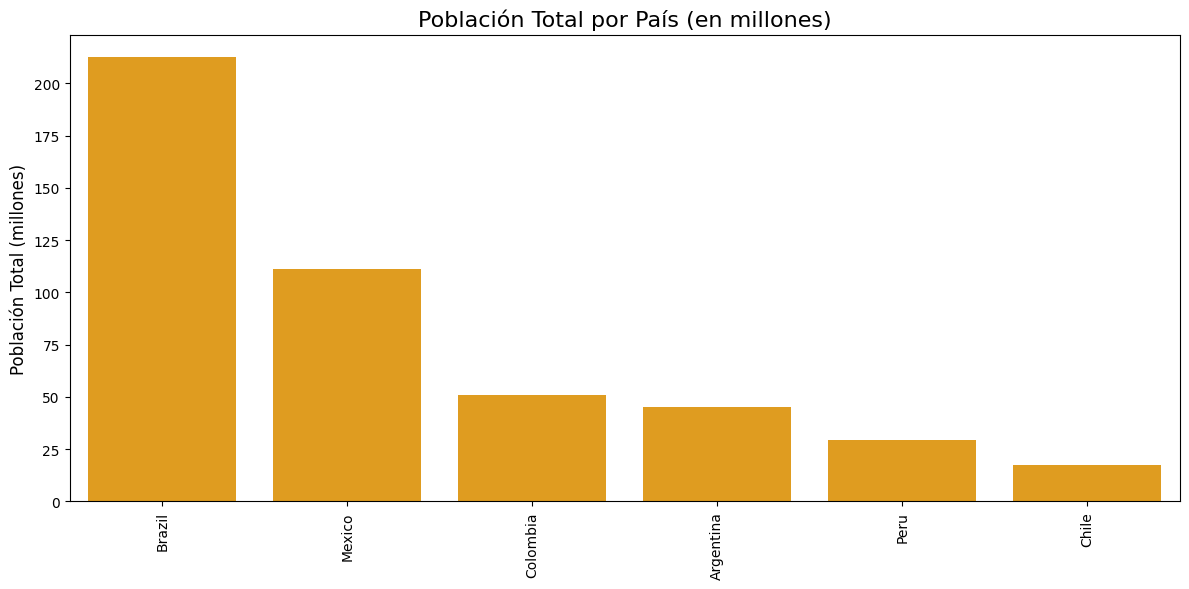

In [59]:
df_ordenado = df_limpio[['country_name', 'population']].sort_values(by='population', ascending=False)

# Convertir población a millones
df_ordenado['population_millions'] = df_ordenado['population'] / 1_000_000

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras con Seaborn
sns.barplot(data=df_ordenado, x='country_name', y='population_millions', color='orange')

# Ajustes adicionales para mejorar la visualización
plt.title('Población Total por País (en millones)', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('Población Total (millones)', fontsize=12)
plt.xticks(rotation=90)  # Rota los nombres de los países para mejor visibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

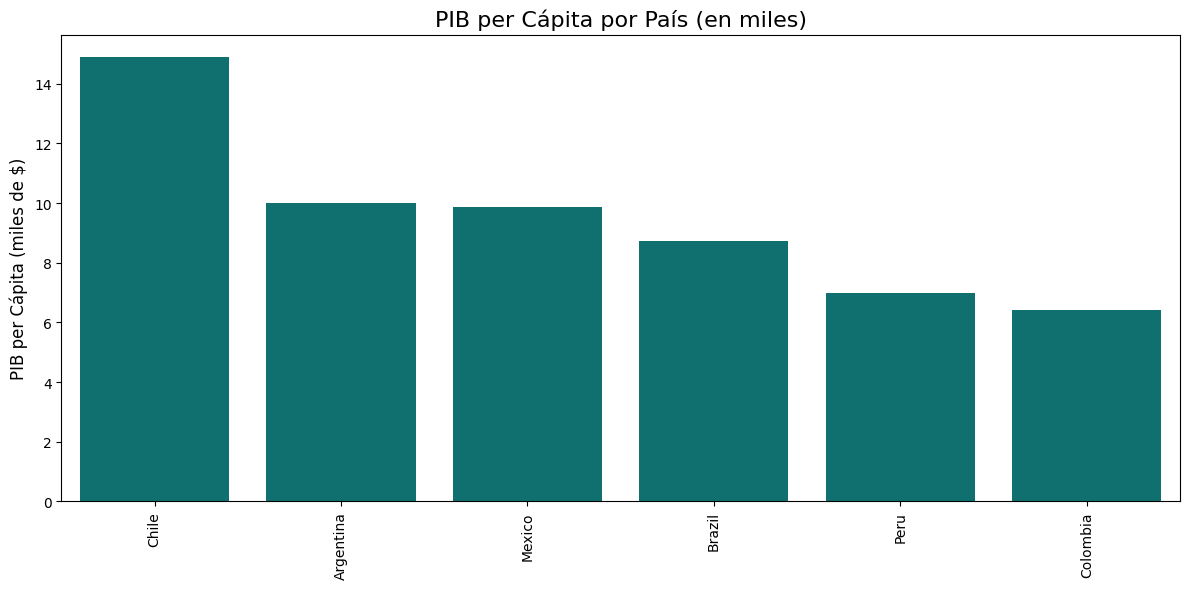

In [58]:
df_ordenado = df_limpio[['country_name', 'gdp_per_capita_usd']].sort_values(by='gdp_per_capita_usd', ascending=False)

# Convertir el PIB per cápita a miles (si ya no lo está)
df_ordenado['pbi_per_capita_thousands'] = df_ordenado['gdp_per_capita_usd'] / 1_000

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras con Seaborn
sns.barplot(data=df_ordenado, x='country_name', y='pbi_per_capita_thousands', color='teal')

# Ajustes adicionales para mejorar la visualización
plt.title('PIB per Cápita por País (en miles)', fontsize=16)
plt.xlabel('', fontsize=12)
plt.ylabel('PIB per Cápita (miles de $)', fontsize=12)
plt.xticks(rotation=90)  # Rota los nombres de los países para mejor visibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

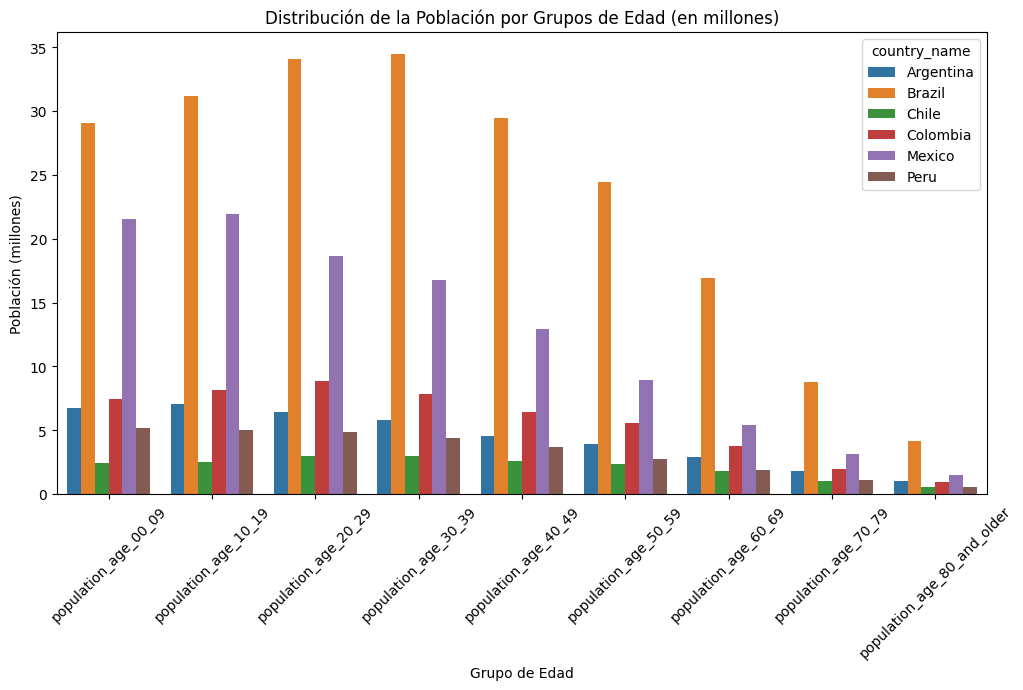

In [25]:
edad_cols = [col for col in df_limpio.columns if 'population_age' in col]

# Crear el DataFrame para los grupos de edad
df_edades = df_limpio[edad_cols + ['country_name']].melt(id_vars='country_name', var_name='Grupo de Edad', value_name='Población')

# Convertir la columna de población a millones
df_edades['Población'] = df_edades['Población'] / 1_000_000

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_edades, x='Grupo de Edad', y='Población', hue='country_name')

# Ajustes para mejorar la visualización
plt.xticks(rotation=45)
plt.title("Distribución de la Población por Grupos de Edad (en millones)")
plt.ylabel('Población (millones)')

# Mostrar el gráfico
plt.show()

<Figure size 2800x1600 with 0 Axes>

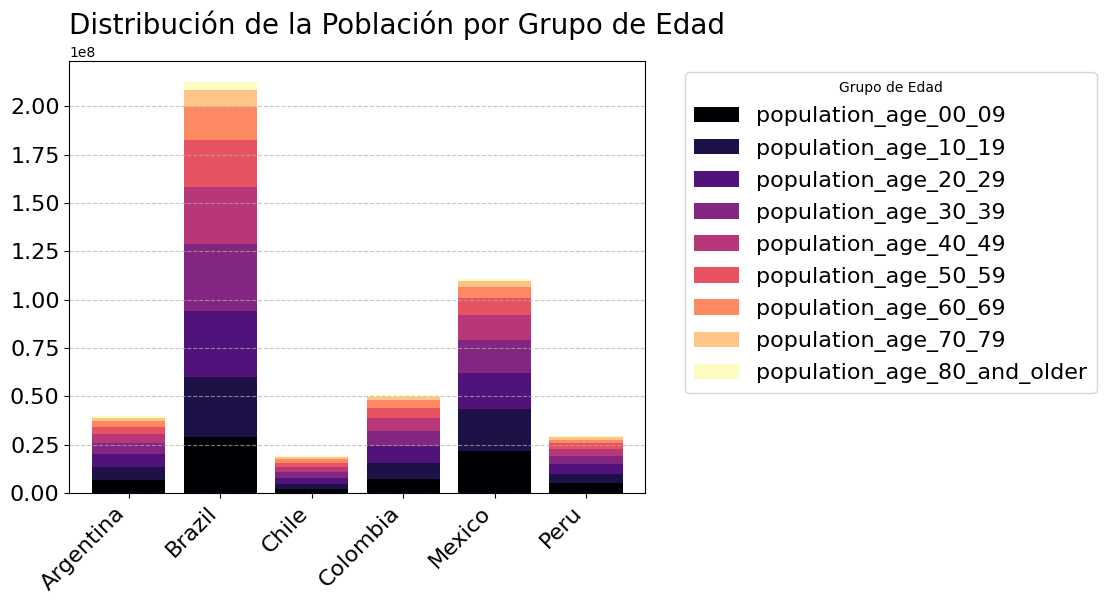

In [26]:
age_columns = [col for col in df_limpio.columns if col.startswith('population_age')]
if age_columns:
    # Tomar los últimos datos disponibles por país
    latest_data = df_limpio.groupby('country_name').last().reset_index()

    age_data = latest_data[['country_name'] + age_columns].set_index('country_name')

    # Crear el gráfico de barras apiladas
    plt.figure(figsize=(28, 16))  # Tamaño aún mayor del gráfico

    # Usar un gráfico de barras apiladas
    ax = age_data.head(6).plot(kind='bar', stacked=True, colormap='magma', width=0.8)

    # Título (más pequeño, centrado y desplazado a la derecha)
    plt.title('Distribución de la Población por Grupo de Edad', fontsize=20, loc='left', pad=20)

    # Añadir la leyenda
    plt.legend(title='Grupo de Edad', fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left')

    # Quitar los nombres de los ejes
    plt.xlabel('')
    plt.ylabel('')

    # Ajustar etiquetas del eje X y Y
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(fontsize=16)

    # Asegurarse de que la cuadrícula no se sobreponga
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Ajustar márgenes para que el gráfico ocupe más espacio
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    # Mostrar el gráfico
    plt.show()

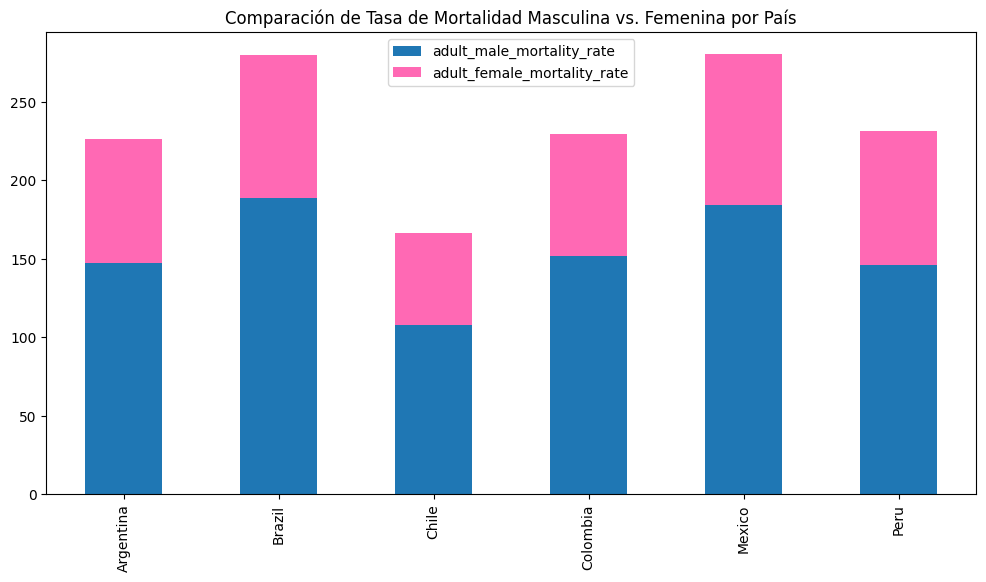

In [27]:
df_limpio.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean().plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6),
    color=['#1f77b4', '#ff69b4'])

plt.title("Comparación de Tasa de Mortalidad Masculina vs. Femenina por País")
plt.ylabel('')
plt.xlabel('')
plt.show()

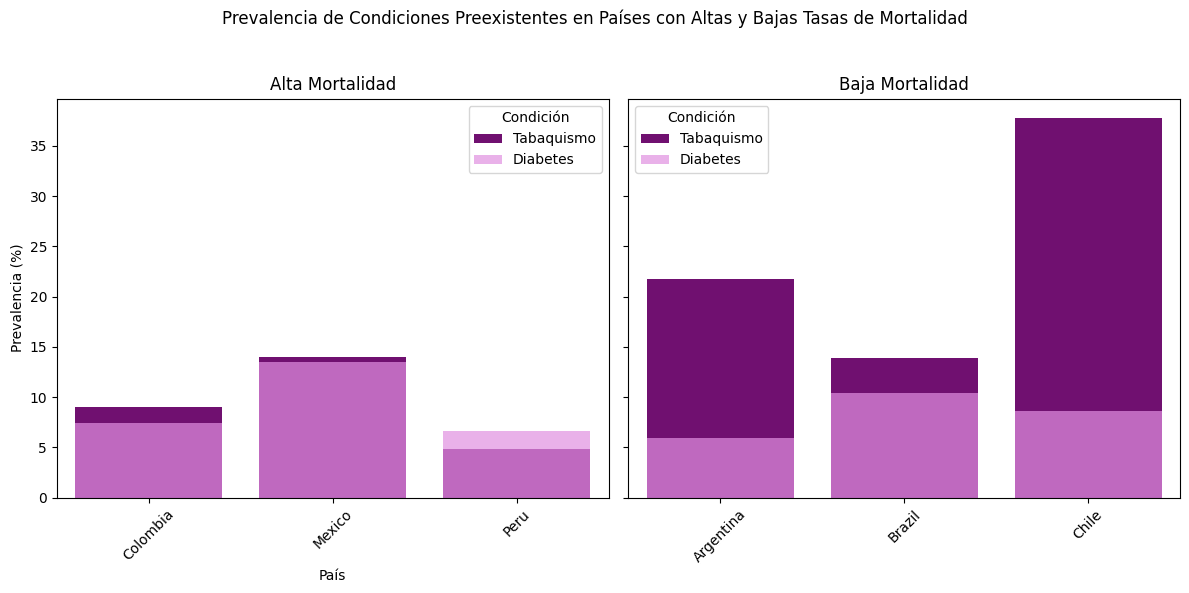

In [28]:
df_limpio['mortality_rate'] = df_limpio['cumulative_deceased'] / df_limpio['cumulative_confirmed'] * 100


country_data = df_limpio.groupby('country_name').last().reset_index()
high_mortality_countries = country_data[country_data['mortality_rate'] > country_data['mortality_rate'].median()]
low_mortality_countries = country_data[country_data['mortality_rate'] <= country_data['mortality_rate'].median()]
conditions = ['smoking_prevalence', 'diabetes_prevalence']

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.barplot(data=high_mortality_countries, x='country_name', y='smoking_prevalence', color="purple", ax=ax[0], label="Tabaquismo")
sns.barplot(data=high_mortality_countries, x='country_name', y='diabetes_prevalence', color="violet", ax=ax[0], label="Diabetes", alpha=0.7)
ax[0].set_title('Alta Mortalidad')
ax[0].set_xlabel('País')
ax[0].set_ylabel('Prevalencia (%)')
ax[0].legend(title='Condición')
ax[0].tick_params(axis='x', rotation=45)


sns.barplot(data=low_mortality_countries, x='country_name', y='smoking_prevalence', color="purple", ax=ax[1], label="Tabaquismo")
sns.barplot(data=low_mortality_countries, x='country_name', y='diabetes_prevalence', color="violet", ax=ax[1], label="Diabetes", alpha=0.7)
ax[1].set_title('Baja Mortalidad')
ax[1].set_xlabel('')
ax[1].legend(title='Condición')
ax[1].tick_params(axis='x', rotation=45)

plt.suptitle('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.ylabel('')
plt.xlabel('')
plt.show()

Descripción de condiciones climáticas:

Por otro lado, se realizó también un análisis de las condiciones ambientales de los diferentes países, para conocer y detectar parámetros que puedan indicar o establecer relaciones con el COVID-19.

a. Boxplot de Temperatura Media por País: Crea un gráfico de caja para visualizar la distribución de la temperatura media por país, mostrando la mediana, la dispersión y los valores atípicos de la temperatura en cada país.

b. Diagramas de Dispersión (Scatterplots):

Casos Confirmados vs Temperatura Media: Un gráfico de dispersión que muestra la relación entre los casos confirmados de COVID-19 y la temperatura media en diferentes países.

Muertes Confirmadas vs Temperatura Media: Similar al gráfico anterior, pero mostrando la relación entre las muertes confirmadas y la temperatura media por país.

c. Violinplots de Variables por País: Genera gráficos de violín para varias variables (casos confirmados, muertes, humedad relativa y temperatura) para ver cómo se distribuyen estas variables entre los países, con énfasis en su variabilidad y distribución.

Estos gráficos ayudan a entender cómo se comportan diferentes variables (temperatura, casos y muertes) en función de los países, permitiendo identificar patrones, correlaciones y diferencias significativas entre ellos.


C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\1279800458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_limpio, x='country_name', y='average_temperature_celsius', palette='pastel', order=orden_paises)


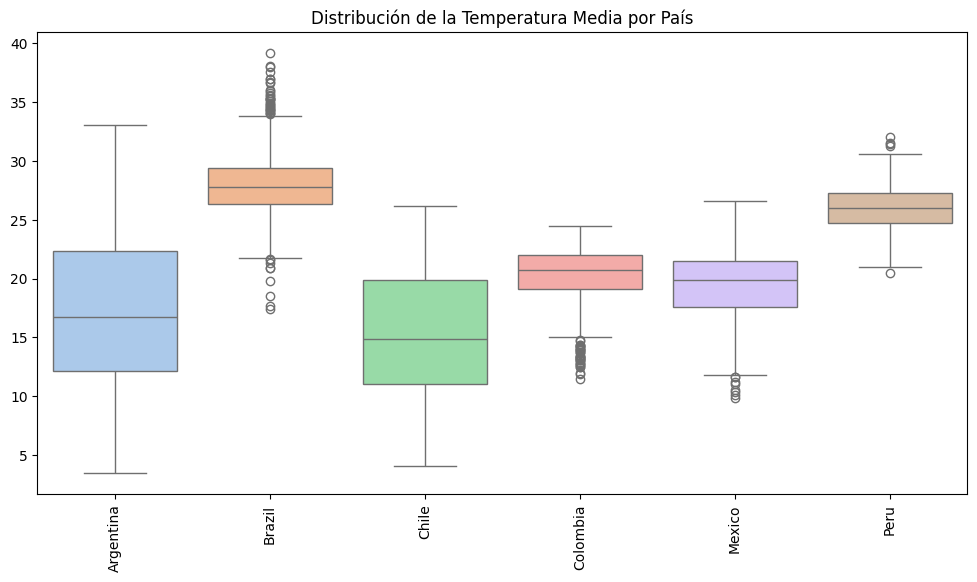

In [29]:
#BOXPLOT DE TEMPERATURA MEDIA POR PAÍS

orden_paises = sorted(df_limpio['country_name'].unique())
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_limpio, x='country_name', y='average_temperature_celsius', palette='pastel', order=orden_paises)
plt.xticks(rotation=90)
plt.title("Distribución de la Temperatura Media por País")
plt.xlabel('')  
plt.ylabel('')
plt.show()

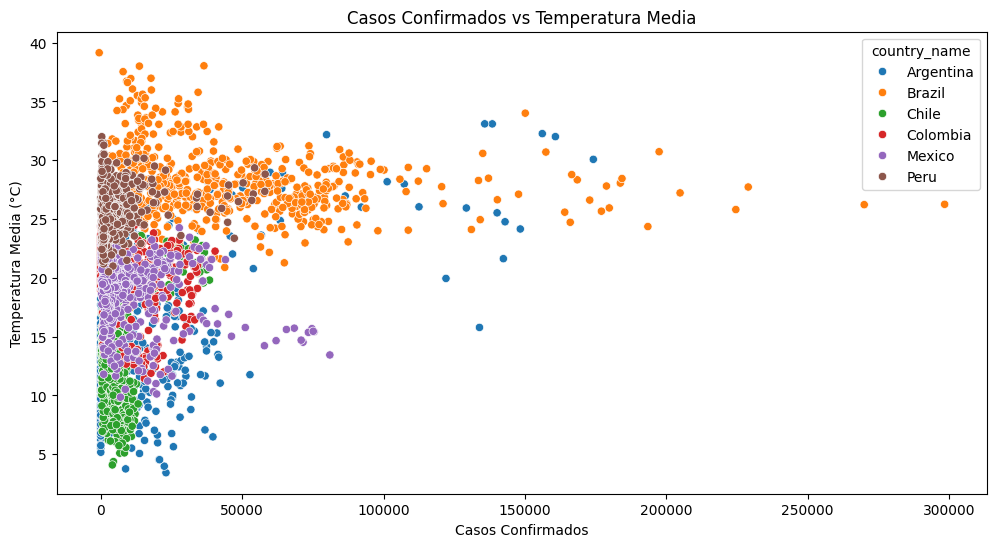

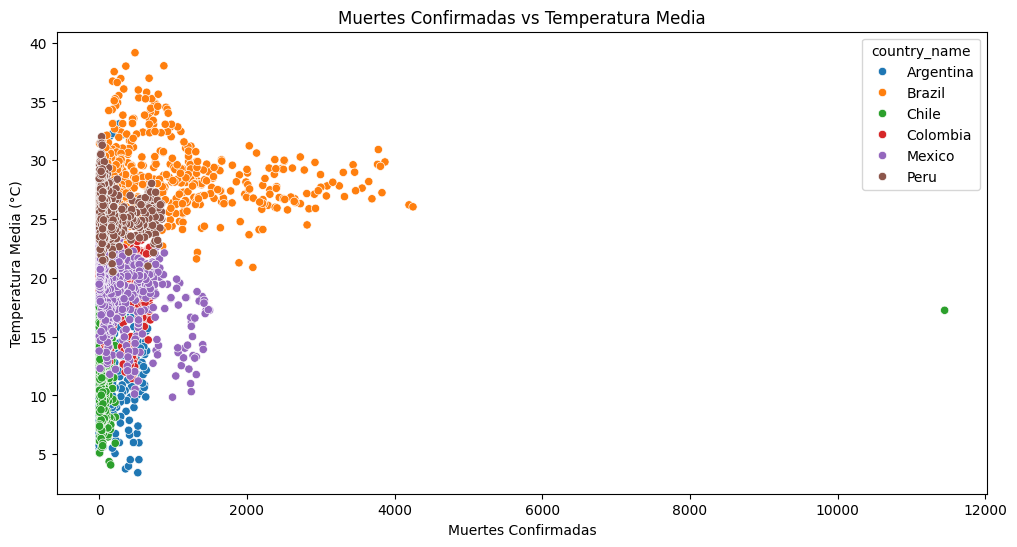

In [30]:
#DIAGRAMAS DE DISPERSIÓN: TEMPERATURA MEDIA VS CASOS CONFIRMADOS Y TEMPERATURA MEDIA VS MUERTES CONFIRMADAS
orden_paises = sorted(df_limpio['country_name'].unique())

# Gráfico de Casos Confirmados vs Temperatura Media
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_limpio, x="new_confirmed", y="average_temperature_celsius", hue="country_name", hue_order=orden_paises)
plt.title("Casos Confirmados vs Temperatura Media")
plt.xlabel('Casos Confirmados')
plt.ylabel('Temperatura Media (°C)')
plt.show()

# Gráfico de Muertes Confirmadas vs Temperatura Media
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_limpio, x="new_deceased", y="average_temperature_celsius", hue="country_name", hue_order=orden_paises)
plt.title("Muertes Confirmadas vs Temperatura Media")
plt.xlabel('Muertes Confirmadas')
plt.ylabel('Temperatura Media (°C)')
plt.show()

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\1549499339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, x='country_name', y=col, palette='muted', ax=axes[i], order=orden_paises)
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\1549499339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, x='country_name', y=col, palette='muted', ax=axes[i], order=orden_paises)
C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\1549499339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpio, x='

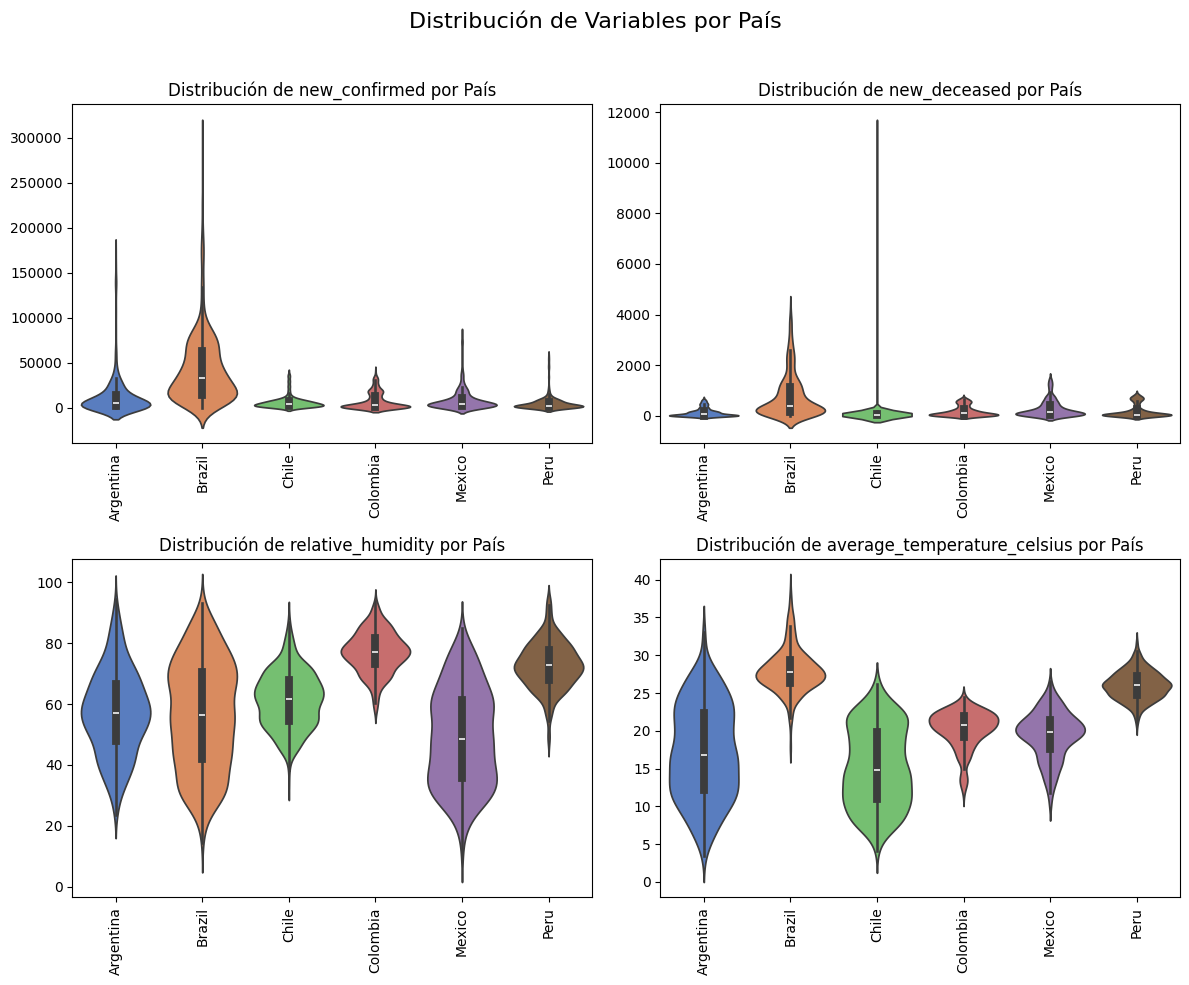

In [31]:
#VIOLINPLOT DE VARIABLES POR PAIS

columnas_violin = ['new_confirmed', 'new_deceased', 'relative_humidity', 'average_temperature_celsius']
orden_paises = sorted(df_limpio['country_name'].unique())

num_cols = 2
num_rows = (len(columnas_violin) + num_cols - 1) // num_cols 


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))
fig.suptitle("Distribución de Variables por País", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(columnas_violin):
    sns.violinplot(data=df_limpio, x='country_name', y=col, palette='muted', ax=axes[i], order=orden_paises)
    axes[i].set_title(f"Distribución de {col} por País", fontsize=12)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].set_xlabel('')  
    axes[i].set_ylabel('') 

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

AVANCE 3: EDA con Numpy y Pandas

En este penúltimo avance del proyecto, se ha realizado un análisis detallado y preparación de datos para la visualización avanzada de la incidencia del COVID-19.

Se comenzó por mostrar la evolución temporal de diferentes variables relacionadas con la pandemia de COVID-19, como los casos confirmados, las muertes y las dosis de vacunas administradas, a través de diversos enfoques:

a. Evolución de Nuevos Casos Confirmados Promedio Global por Mes
Este gráfico muestra el promedio mensual de nuevos casos confirmados a nivel global. Al agrupar por mes y calcular el promedio de casos nuevos, se observa la tendencia general de la propagación del virus en el tiempo, sin tener en cuenta la variabilidad entre países. Esto permite ver cómo evolucionó la pandemia globalmente mes a mes.

b. Evolución de Nuevos Casos Confirmados Promedio por Mes y por País
Este gráfico presenta el promedio mensual de nuevos casos confirmados desglosado por país. La visualización muestra la evolución del número de casos nuevos en diferentes países, permitiendo comparar el comportamiento de la pandemia entre ellos a lo largo del tiempo.

c. Suma de Casos Acumulados Máximos por Mes
Aquí se visualiza la suma de los máximos de los casos acumulados de COVID-19 por mes a nivel global. La idea es resaltar los picos de casos acumulados más altos cada mes, proporcionando una perspectiva general de la evolución más extrema de los casos a lo largo del tiempo.

d. Evolución de Casos Acumulados por Mes (en Millones) y por País
Este gráfico muestra la evolución de los casos acumulados de COVID-19 por país a lo largo del tiempo, expresados en millones. El enfoque aquí es observar cómo el total de casos acumulados ha crecido mes a mes, desglosado por cada país, lo que permite ver diferencias regionales en el progreso de la pandemia.

e .Evolución de Dosis de Vacunas Administradas por Mes (en Millones)
Este gráfico muestra la evolución de las dosis de vacunas administradas, expresadas en millones, a nivel global o por país, a través del tiempo. Permite observar cómo la distribución de las vacunas ha progresado a lo largo de los meses, comparando la velocidad de administración entre países.

f. Evolución de Nuevos Fallecimientos Promedio Global por Mes
Similar al gráfico de casos confirmados, este gráfico muestra el promedio mensual de nuevos fallecimientos globalmente. Proporciona una visión de la mortalidad asociada con el COVID-19 a medida que avanzan los meses.

g. Evolución de Fallecimientos Promedio por País y por Mes
Este gráfico desglosa los nuevos fallecimientos promedio por mes para cada país. Permite observar las diferencias en la tasa de mortalidad entre países y cómo evolucionan a lo largo del tiempo.

h. Total de Fallecimientos Acumulados por Mes (en Millones)
Similar al gráfico de casos acumulados, este gráfico muestra el total de fallecimientos acumulados cada mes, en millones. Permite observar cómo se acumula el número de muertes a lo largo del tiempo, tanto a nivel global como por país.

i. Evolución de Fallecimientos por Mes (en Millones)
Este gráfico visualiza la evolución de los fallecimientos mes a mes, desglosado por país. Muestra cómo las tasas de mortalidad han variado a lo largo del tiempo en diferentes países, permitiendo identificar patrones de mortalidad y comparar su evolución.

En sintesis, estos gráficos muestran la evolución de la pandemia a través del tiempo, analizando nuevos casos confirmados, muertes y dosis de vacunas administradas a nivel global y por país. Se utiliza el promedio mensual para observar las tendencias generales y la suma de máximos acumulados para resaltar los picos de casos y fallecimientos.



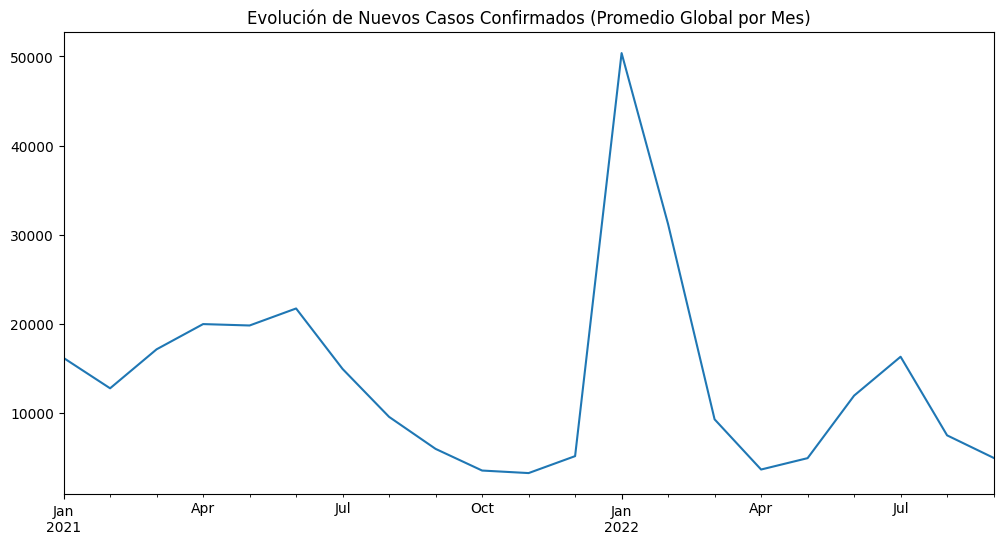

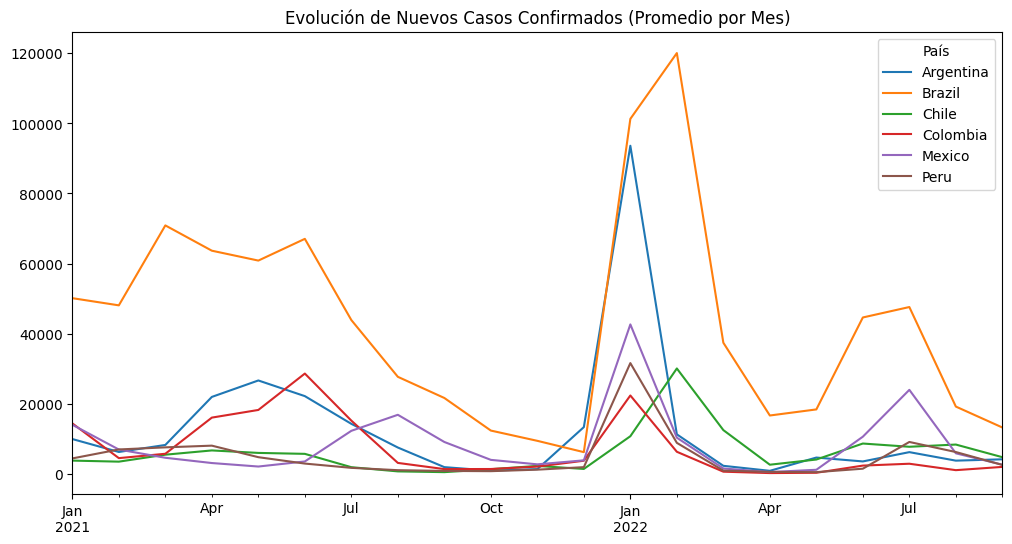

In [32]:
#EVOLUCIÓN DE VARIABLES A TRAVÉS DEL TIEMPO (MES)
df_limpio['date'] = pd.to_datetime(df_limpio['date'])
df_limpio['month'] = df_limpio['date'].dt.to_period('M')

casos_mensual_global = df_limpio.groupby('month')['new_confirmed'].mean()
casos_mensual_global.plot(figsize=(12, 6))
plt.title("Evolución de Nuevos Casos Confirmados (Promedio Global por Mes)")
plt.xlabel('')
plt.ylabel('')
plt.show()

casos_mensual = df_limpio.groupby(['country_name', 'month'])['new_confirmed'].mean().unstack()
casos_mensual.T.plot(figsize=(12, 6))
plt.title("Evolución de Nuevos Casos Confirmados (Promedio por Mes)")
plt.xlabel('')
plt.ylabel('')
plt.legend(title="País")
plt.show()


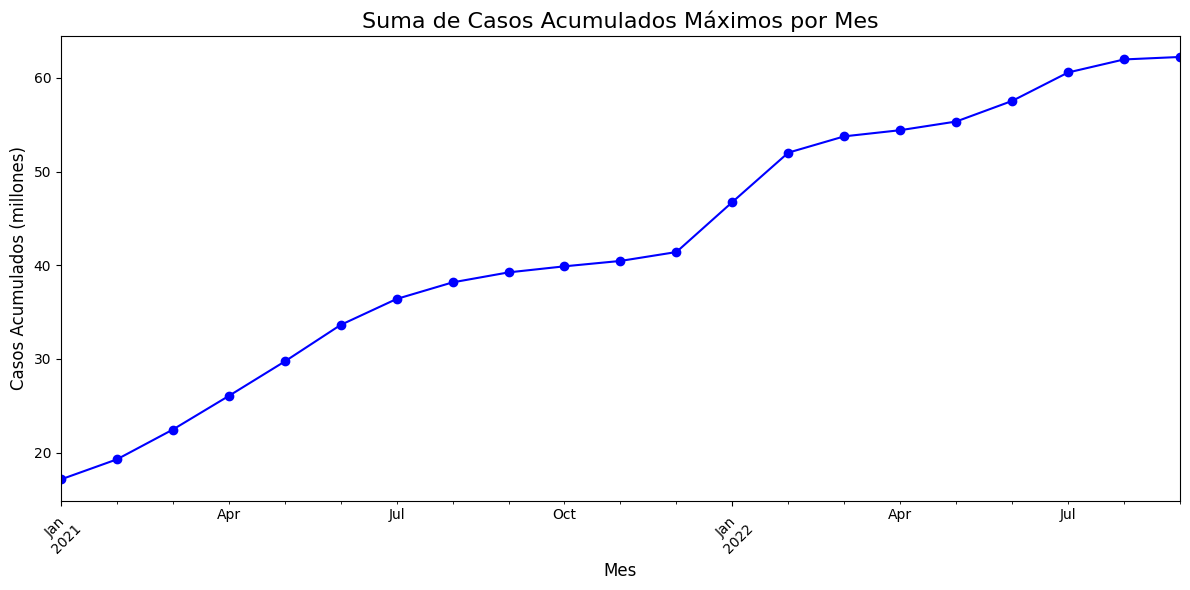

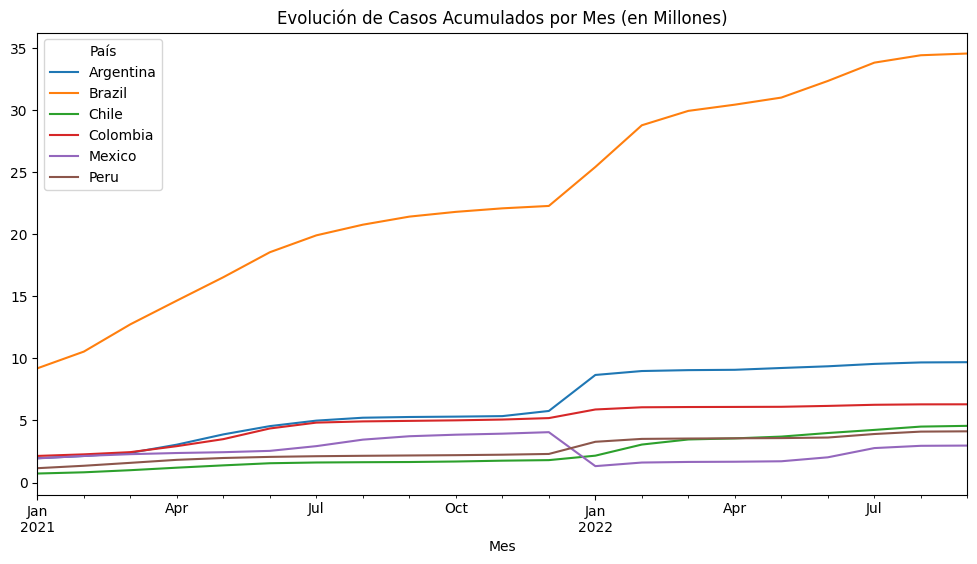

In [33]:
df_limpio['date'] = pd.to_datetime(df_limpio['date'])
df_limpio['month'] = df_limpio['date'].dt.to_period('M')

# Convertir a millones
df_limpio['cumulative_confirmed_millones'] = df_limpio['cumulative_confirmed'] / 1e6

# Obtener el máximo de los casos acumulados por país y por mes
max_por_mes_y_pais = df_limpio.groupby(['month', 'country_name'])['cumulative_confirmed_millones'].max().reset_index()

# Ahora, sumamos los máximos mes a mes
max_por_mes_sumado = max_por_mes_y_pais.groupby('month')['cumulative_confirmed_millones'].sum()

# Crear el gráfico lineal
plt.figure(figsize=(12, 6))
max_por_mes_sumado.plot(kind='line', marker='o', color='b')

# Título y etiquetas
plt.title('Suma de Casos Acumulados Máximos por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Casos Acumulados (millones)', fontsize=12)
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejorar visibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()


acum_mensual_pais = df_limpio.groupby(['country_name', 'month'])['cumulative_confirmed_millones'].max().unstack()
acum_mensual_pais.T.plot(figsize=(12, 6))
plt.title("Evolución de Casos Acumulados por Mes (en Millones)")
plt.xlabel('Mes')
plt.ylabel('')
plt.legend(title="País")
plt.show()


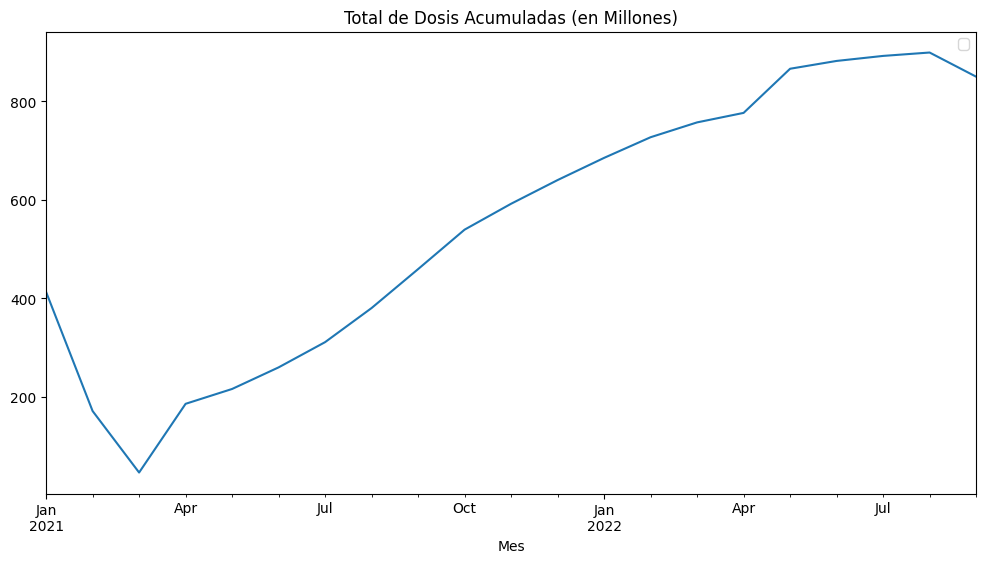

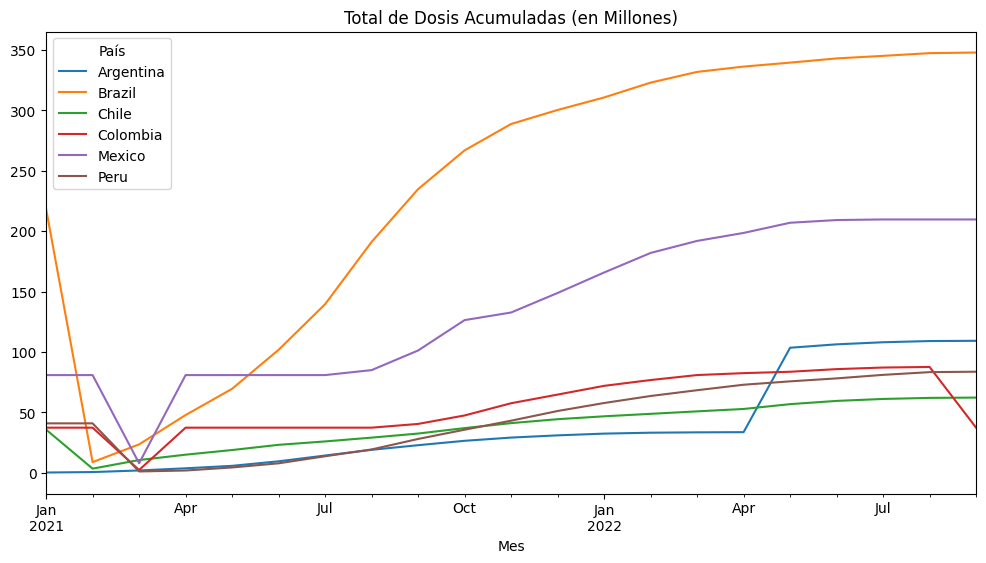

In [34]:
df_limpio['cumulative_vaccine_doses_administered_millones'] = df_limpio['cumulative_vaccine_doses_administered'] / 1e6
max_dosis_mensual_por_pais = df_limpio.groupby(['country_name', 'month'])['cumulative_vaccine_doses_administered_millones'].max().unstack()

suma_max_dosis = max_dosis_mensual_por_pais.sum()

suma_max_dosis.T.plot(figsize=(12, 6))
plt.title("Total de Dosis Acumuladas (en Millones)")
plt.xlabel('Mes')
plt.ylabel('')
plt.legend("")
plt.show()


max_dosis_mensual_por_pais.T.plot(figsize=(12, 6))
plt.title("Total de Dosis Acumuladas (en Millones)")
plt.xlabel('Mes')
plt.ylabel('')
plt.legend(title="País")
plt.show()

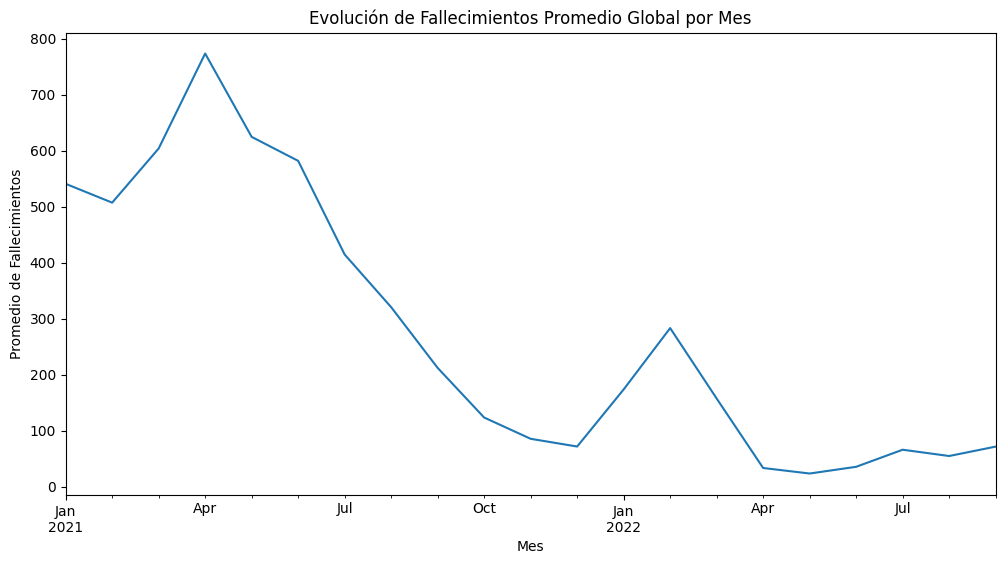

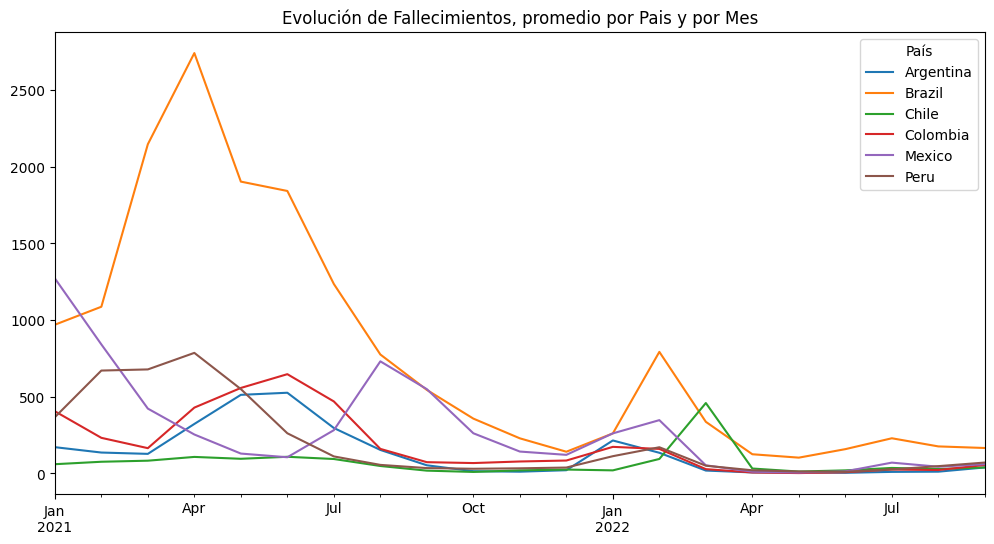

In [35]:
casos_mensual_global = df_limpio.groupby('month')['new_deceased'].mean()
casos_mensual_global.plot(figsize=(12, 6))
plt.title("Evolución de Fallecimientos Promedio Global por Mes")
plt.xlabel('Mes')
plt.ylabel('Promedio de Fallecimientos')
plt.show()

muertes_mensual = df_limpio.groupby(['country_name', 'month'])['new_deceased'].mean().unstack()
muertes_mensual.T.plot(figsize=(12, 6))
plt.title("Evolución de Fallecimientos, promedio por Pais y por Mes")
plt.xlabel('')
plt.ylabel('')
plt.legend(title="País")
plt.show()

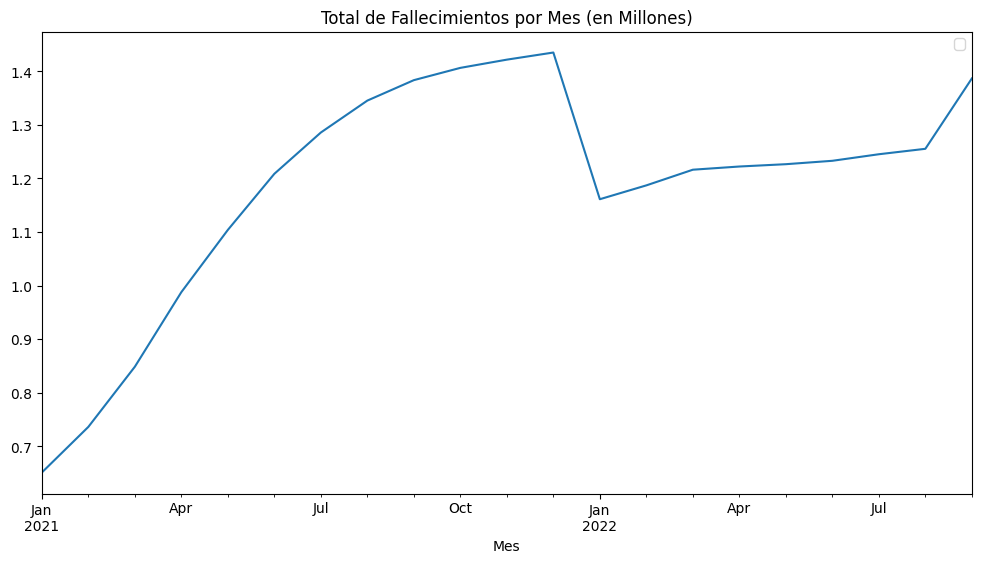

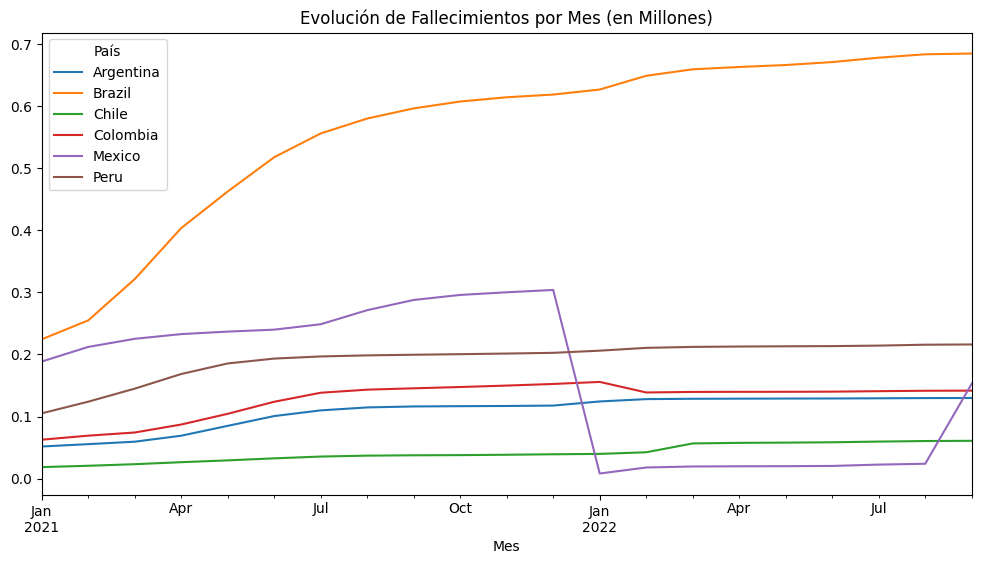

In [50]:
df_limpio['cumulative_deceased_millones'] = df_limpio['cumulative_deceased'] / 1e6
max_deceased_mensual_por_pais = df_limpio.groupby(['country_name', 'month'])['cumulative_deceased_millones'].max().unstack()

suma_max_deceased = max_deceased_mensual_por_pais.sum()

suma_max_deceased.T.plot(figsize=(12, 6))
plt.title("Total de Fallecimientos por Mes (en Millones)")
plt.xlabel('Mes')
plt.ylabel('')
plt.legend("")
plt.show()

max_deceased_mensual_por_pais.T.plot(figsize=(12, 6))
plt.title("Evolución de Fallecimientos por Mes (en Millones)")
plt.xlabel('Mes')
plt.ylabel('')
plt.legend(title="País")
plt.show()

Se realizaron tambien dos graficos de autocorrelacion. La autocorrelación mide la relación de una observación con las observaciones previas en la misma serie temporal.

a. El primer gráfico se intenta entender si hay patrones o dependencias entre los casos nuevos de un mes y los meses previos. Un valor de autocorrelación alto en un lag específico sugiere que los casos nuevos de un mes están relacionados con los casos nuevos de meses anteriores, lo que podría indicar una tendencia o un ciclo en la propagación del virus.

b. El segundo gráfico calcula la autocorrelación de los nuevos decesos en promedio por mes. Al igual que en el primer gráfico, el objetivo es observar si los nuevos decesos de un mes tienen alguna relación con los casos acumulados de meses previos.

En resumen, con estos gráficos se busca identificar patrones temporales o estacionales en la propagación de casos confirmados de COVID-19, ya sea en términos de nuevos casos o acumulados, observando cómo influye la dinámica de los meses anteriores en los datos actuales.

<Figure size 1200x600 with 0 Axes>

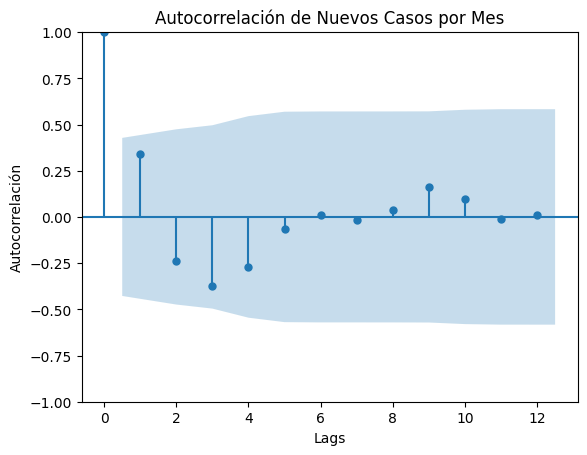

<Figure size 1200x600 with 0 Axes>

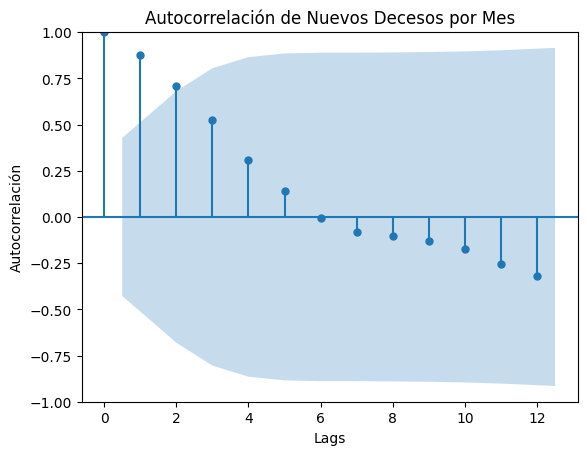

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

tasa_confirmados_global = df_limpio.groupby('month')['new_confirmed'].mean()

plt.figure(figsize=(12, 6))
plot_acf(tasa_confirmados_global, lags=12)
plt.title("Autocorrelación de Nuevos Casos por Mes")
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

tasa_confirmados_global = df_limpio.groupby('month')['new_deceased'].mean()

plt.figure(figsize=(12, 6))
plot_acf(tasa_confirmados_global, lags=12)
plt.title("Autocorrelación de Nuevos Decesos por Mes")
plt.xlabel('Lags')
plt.ylabel('Autocorrelación')
plt.show()

Otros graficos de series temporales:

Los gráficos generados a continuación tienen como objetivo analizar la evolución de los casos confirmados y muertes por COVID-19 a través del tiempo, tanto a nivel global como por país, segmentados por diferentes unidades temporales (meses, semanas, días de la semana).

a. Se comparan los casos confirmados y la temperatura promedio mensual.
b. Se analiza la tasa de mortalidad global y por país, observando su variación a lo largo del tiempo.
c. Se examina la evolución de casos confirmados y muertes semanales.
d. Se observan los casos confirmados por día de la semana a nivel global y por país para identificar variaciones diarias.

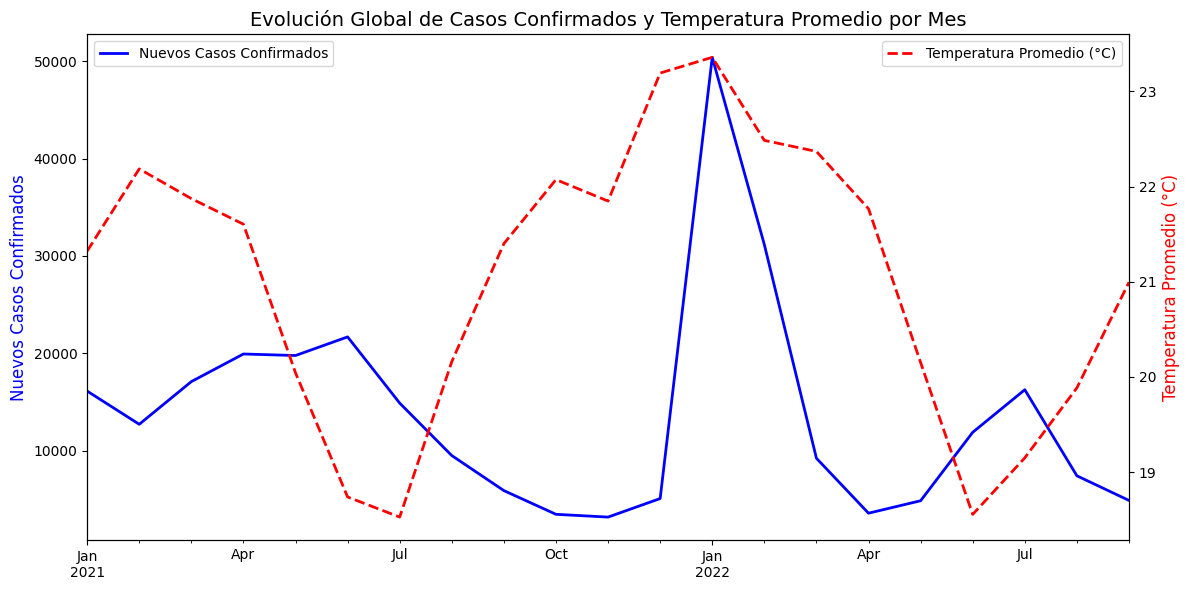

In [39]:
mensual = df_limpio.groupby('month')[['new_confirmed', 'average_temperature_celsius']].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))
mensual['new_confirmed'].plot(ax=ax1, color='blue', label='Nuevos Casos Confirmados', linewidth=2)

ax2 = ax1.twinx()
mensual['average_temperature_celsius'].plot(ax=ax2, color='red', label='Temperatura Promedio (°C)', linewidth=2, linestyle='--')

plt.title("Evolución Global de Casos Confirmados y Temperatura Promedio por Mes", fontsize=14)
ax1.set_xlabel('', fontsize=12)
ax1.set_ylabel('Nuevos Casos Confirmados', color='blue', fontsize=12)
ax2.set_ylabel('Temperatura Promedio (°C)', color='red', fontsize=12)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\3845849520.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mortality_rate_mensual_global = df_limpio.groupby('month').apply(


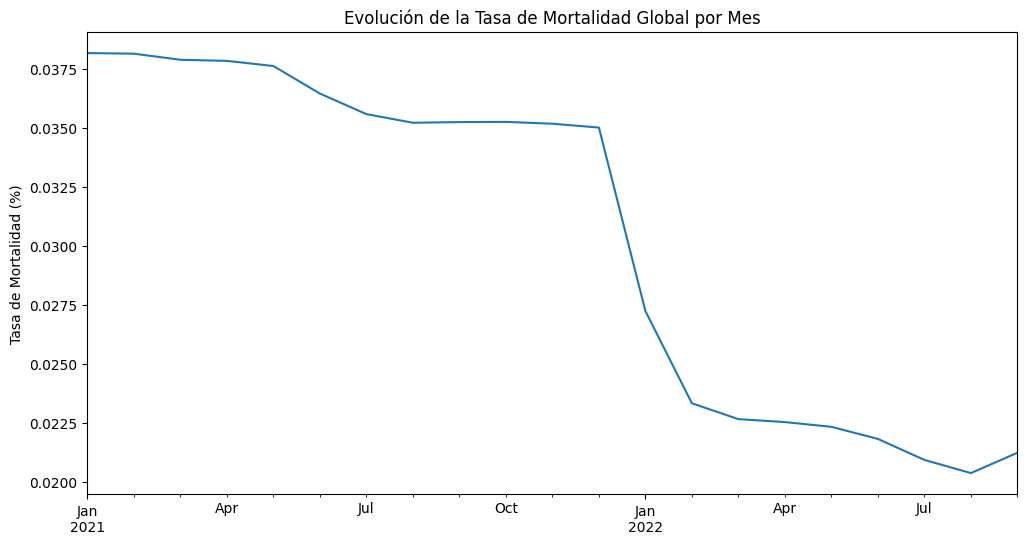

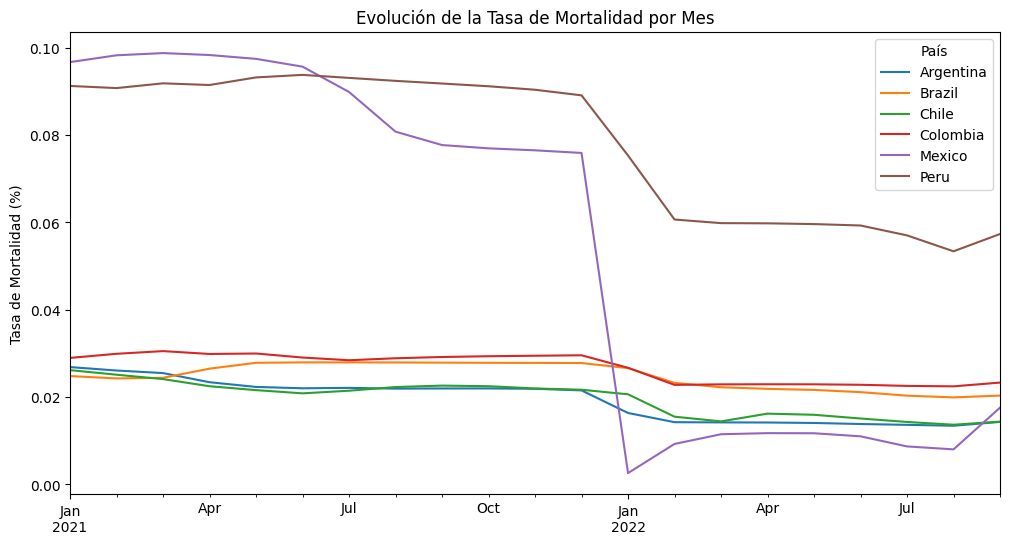

In [40]:
df_limpio['mortality_rate'] = df_limpio['cumulative_deceased'] / df_limpio['cumulative_confirmed']

mortality_rate_mensual_global = df_limpio.groupby('month').apply(
    lambda x: (x['cumulative_deceased'].sum() / x['cumulative_confirmed'].sum()))

mortality_rate_mensual_global.plot(figsize=(12, 6))
plt.title("Evolución de la Tasa de Mortalidad Global por Mes")
plt.xlabel('')
plt.ylabel('Tasa de Mortalidad (%)')
plt.show()


mortality_rate_mensual = df_limpio.groupby(['country_name', 'month'])['mortality_rate'].mean().unstack()
mortality_rate_mensual.T.plot(figsize=(12, 6))
plt.title("Evolución de la Tasa de Mortalidad por Mes")
plt.xlabel('')
plt.ylabel('Tasa de Mortalidad (%)')
plt.legend(title="País")
plt.show()

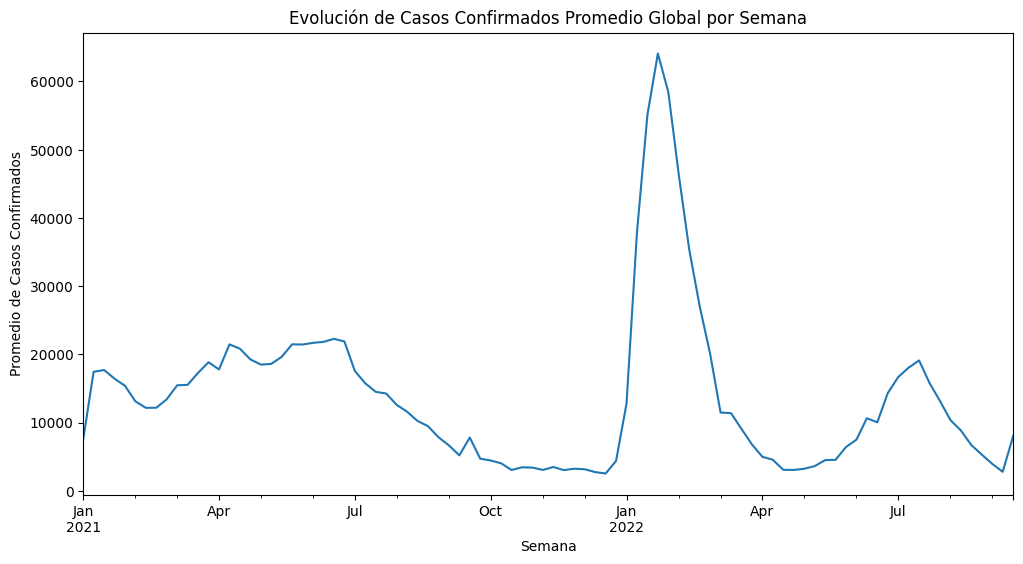

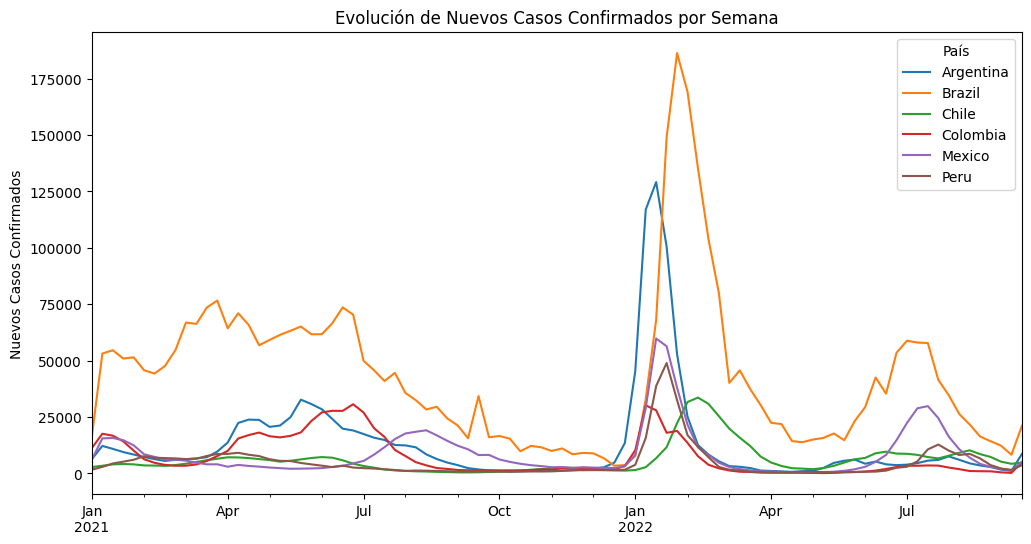

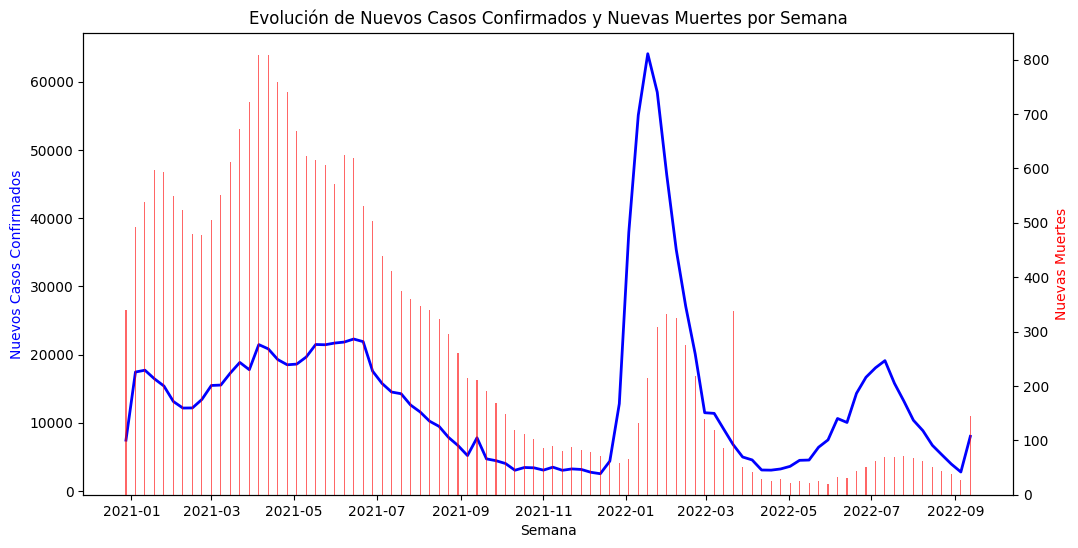

In [52]:
df_limpio.reset_index(inplace=True)

df_limpio['date'] = pd.to_datetime(df_limpio['date'])
df_limpio['week'] = df_limpio['date'].dt.to_period('W')

casos_semanal_global = df_limpio.groupby('week')['new_confirmed'].mean()
casos_semanal_global.plot(figsize=(12, 6))
plt.title("Evolución de Casos Confirmados Promedio Global por Semana")
plt.xlabel('Semana')
plt.ylabel('Promedio de Casos Confirmados')
plt.show()

casos_semanal = df_limpio.groupby(['country_name', 'week'])['new_confirmed'].mean().unstack()
casos_semanal.T.plot(figsize=(12, 6))
plt.title("Evolución de Nuevos Casos Confirmados por Semana")
plt.xlabel('')
plt.ylabel('Nuevos Casos Confirmados')
plt.legend(title="País")
plt.show()

nuevos_confirmados_semanal = df_limpio.groupby('week')['new_confirmed'].mean()
muertes_semanal = df_limpio.groupby('week')['new_deceased'].mean()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(nuevos_confirmados_semanal.index.to_timestamp(), nuevos_confirmados_semanal, color='b', label='Nuevos Casos Confirmados', linewidth=2)
ax1.set_xlabel('Semana')
ax1.set_ylabel('Nuevos Casos Confirmados', color='b')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.bar(muertes_semanal.index.to_timestamp(), muertes_semanal, color='r', alpha=0.6, label='Nuevas Muertes')
ax2.set_ylabel('Nuevas Muertes', color='r')
ax2.tick_params(axis='y')


plt.title("Evolución de Nuevos Casos Confirmados y Nuevas Muertes por Semana")
plt.show()

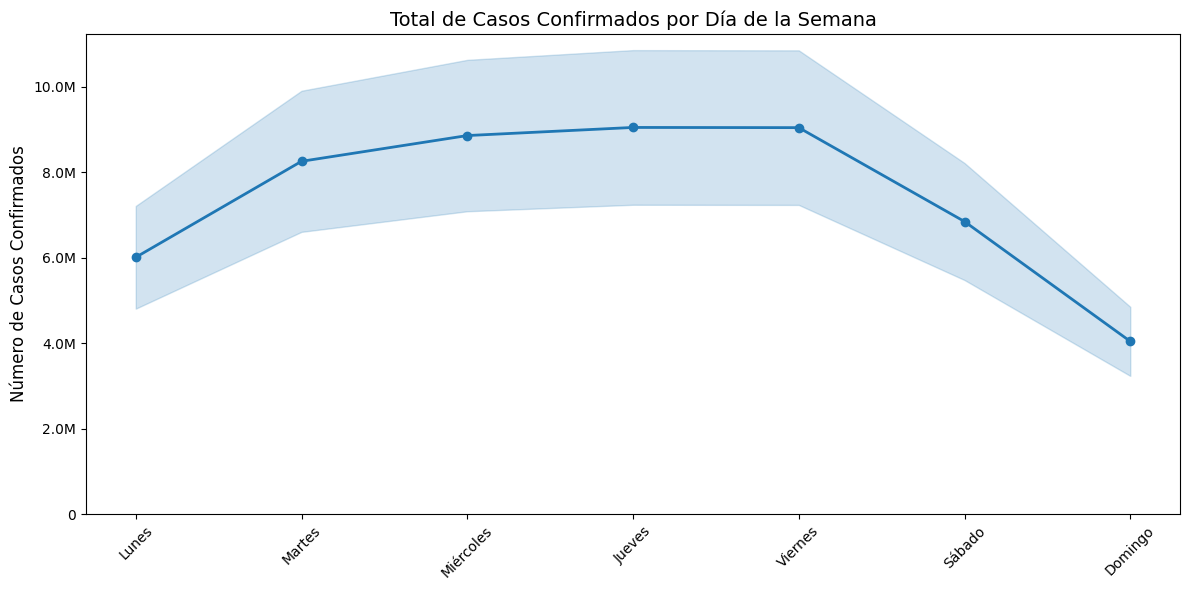

In [53]:
df_limpio['day_of_week'] = df_limpio['date'].dt.dayofweek
casos_por_dia = df_limpio.groupby('day_of_week')['new_confirmed'].sum()

dias_de_la_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
casos_por_dia.index = casos_por_dia.index.map(lambda x: dias_de_la_semana[x])

upper_bound = casos_por_dia * 1.2
lower_bound = casos_por_dia * 0.8

plt.figure(figsize=(12, 6))

line, = plt.plot(casos_por_dia.index, casos_por_dia, marker='o', label='Nuevos Casos Confirmados', linewidth=2)

line_color = line.get_color()

plt.fill_between(casos_por_dia.index, lower_bound, upper_bound, alpha=0.2, color=line_color)

plt.title("Total de Casos Confirmados por Día de la Semana", fontsize=14)
plt.xlabel('')
plt.ylabel("Número de Casos Confirmados", fontsize=12)


def format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K' 
    else:
        return f'{x:.0f}'


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_axis))
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

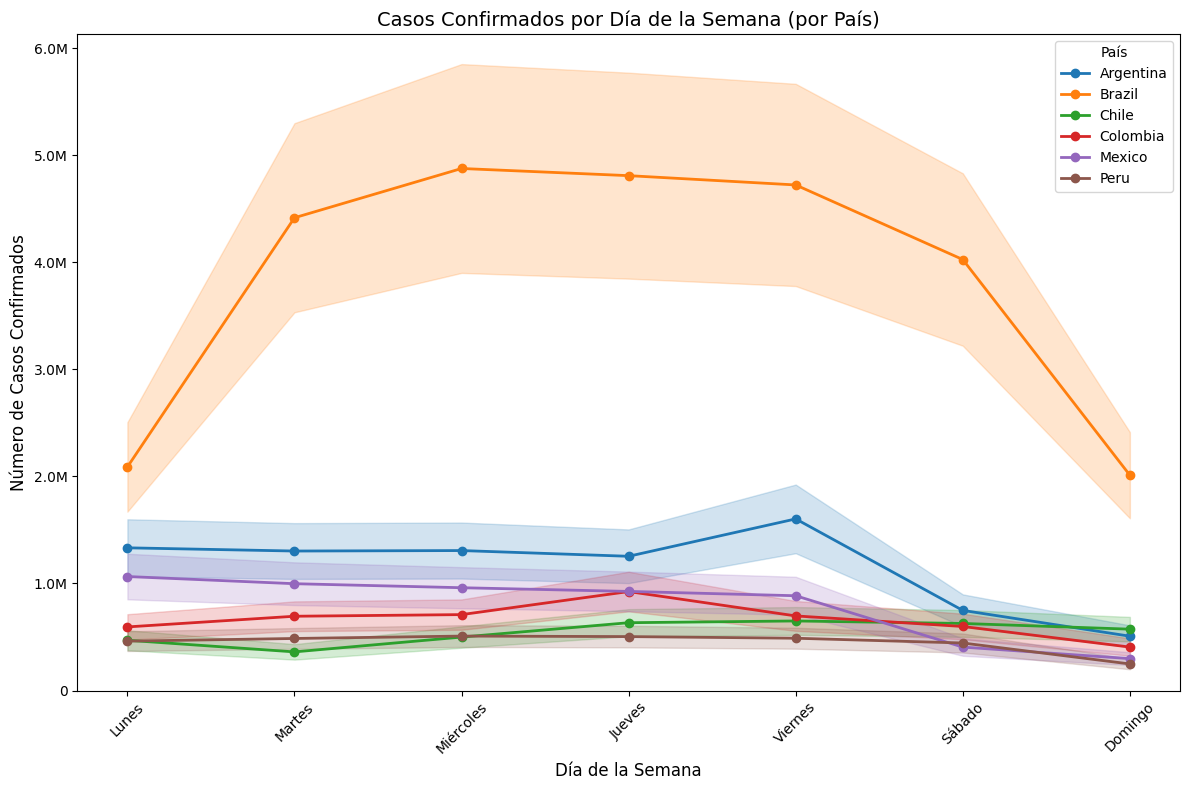

In [44]:
casos_por_dia_pais = df_limpio.groupby(['country_name', 'day_of_week'])['new_confirmed'].sum().unstack()

dias_de_la_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
casos_por_dia_pais.columns = casos_por_dia_pais.columns.map(lambda x: dias_de_la_semana[x])


plt.figure(figsize=(12, 8))

for pais in casos_por_dia_pais.index:
    y = casos_por_dia_pais.loc[pais]
    
    upper_bound = y * 1.2
    lower_bound = y * 0.8 
    
    line, = plt.plot(casos_por_dia_pais.columns, y, marker='o', label=pais, linewidth=2)

    line_color = line.get_color()
    
    plt.fill_between(casos_por_dia_pais.columns, lower_bound, upper_bound, alpha=0.2, color=line_color)

plt.title("Casos Confirmados por Día de la Semana (por País)", fontsize=14)
plt.xlabel("Día de la Semana", fontsize=12)
plt.ylabel("Número de Casos Confirmados", fontsize=12)

def format_axis(x, pos):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K' 
    else:
        return f'{x:.0f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_axis))
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.tight_layout()

plt.legend(title='País')
plt.show()

Analisis de estrategias de vacunacion por pais:

a. Promedio de Dosis Administradas por País: El gráfico de barras muestra el promedio de dosis administradas en cada país, ayudando a identificar qué países han administrado más dosis, en términos de millones.

b. Comparación de Estrategias de Vacunación: Este gráfico compara la cantidad de dosis administradas por cada 100 personas en cada país, permitiendo ver cómo se han distribuido las dosis en relación con la población de cada país. Esto muestra qué países han avanzado más en la vacunación en relación con su tamaño poblacional.

c. Cobertura de Vacunación: Este gráfico muestra el porcentaje de la población que ha recibido al menos una dosis de vacuna, ayudando a visualizar qué países han logrado una mayor cobertura de vacunación en relación con su población total.

En conjunto, estos gráficos permiten evaluar el desempeño de las estrategias de vacunación de cada país y comparar cómo diferentes países han manejado la distribución de vacunas.

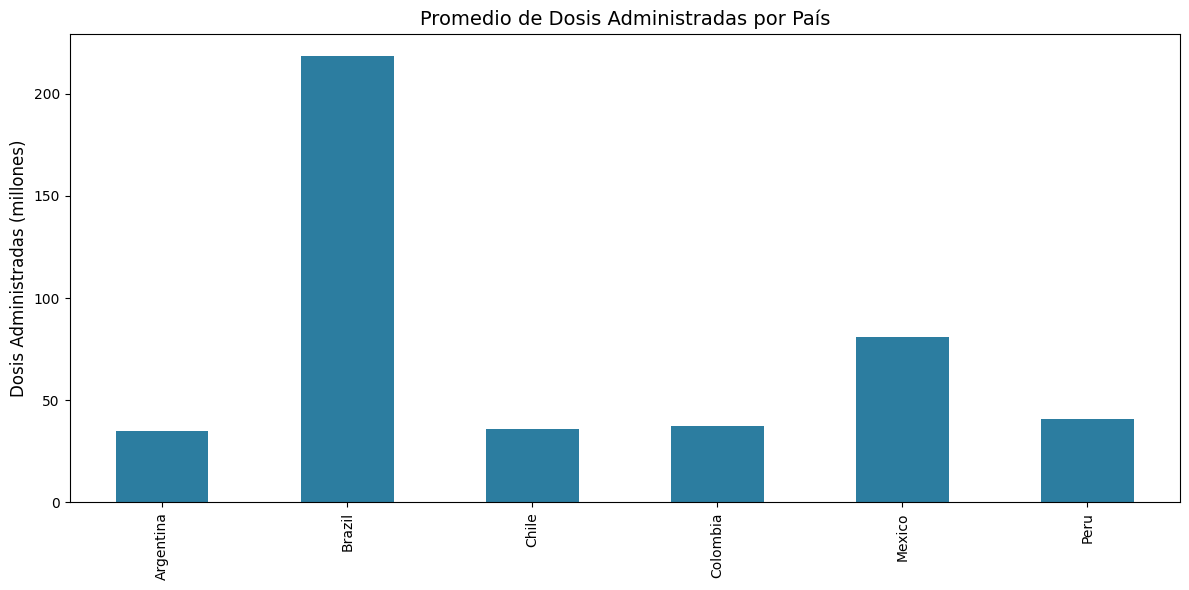

In [45]:
#COMPORTAMIENTO DE LAS DOSIS ADMINISTRADAS DE TODOS LOS PAÍSES (VALOR MEDIO)
promedio_dosis = df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].mean()

plt.figure(figsize=(12, 6))
promedio_dosis.plot(kind='bar', color='#2c7da0')

plt.title("Promedio de Dosis Administradas por País", fontsize=14)
plt.xlabel('')
plt.ylabel('Dosis Administradas (millones)', fontsize=12)

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-6:.0f}'))
plt.tight_layout()
plt.show()

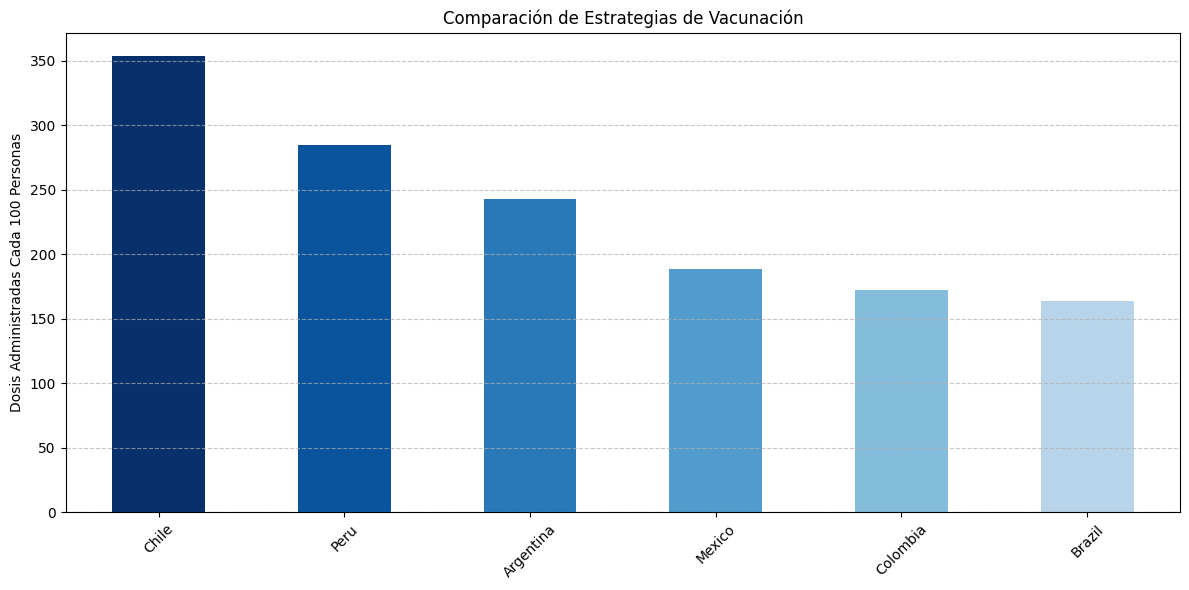

In [46]:
#Comparación de Estrategias de Vacunación (Dosis cada 100 Personas)
estrategia_vacunacion = (
    df_limpio.groupby('country_name')['cumulative_vaccine_doses_administered'].max() /
    df_limpio.groupby('country_name')['population'].mean() * 100)

estrategia_vacunacion = estrategia_vacunacion.sort_values(ascending=False)

plt.figure(figsize=(12, 6))

colors = plt.cm.Blues(np.linspace(1, 0.3, len(estrategia_vacunacion)))
estrategia_vacunacion.plot(kind='bar', color=colors)

plt.xlabel('País')
plt.ylabel('Dosis Administradas Cada 100 Personas')
plt.title('Comparación de Estrategias de Vacunación') 
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.xlabel('')
plt.tight_layout()
plt.show()

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\4129850572.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_limpio, x='country_name', y='vaccination_rate', palette='viridis')


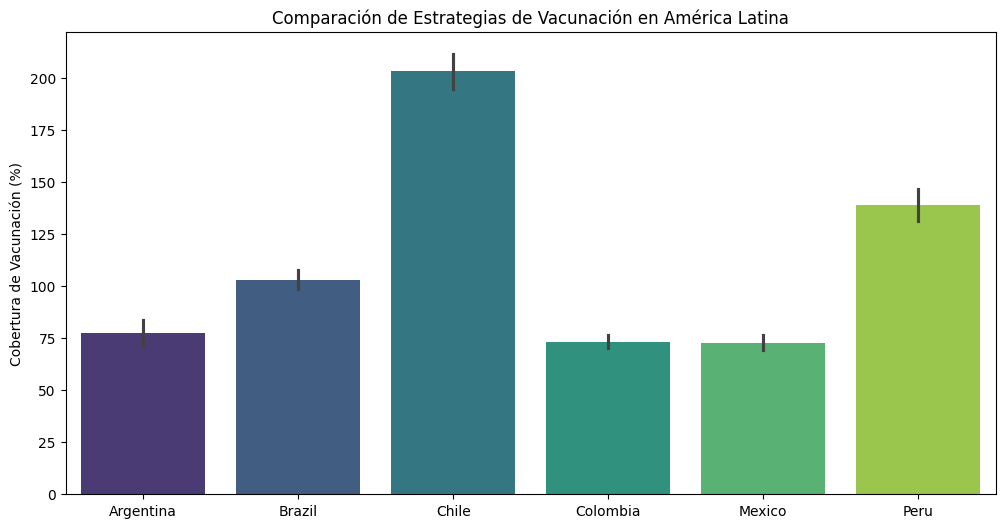

In [47]:
#Cobertura de Vacunación (%). Cuánto porcentaje de la población ha recibido al menos una dosis.

df_limpio['vaccination_rate'] = (df_limpio['cumulative_vaccine_doses_administered'] / df_limpio['population']) * 100
plt.figure(figsize=(12, 6))
sns.barplot(data=df_limpio, x='country_name', y='vaccination_rate', palette='viridis')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.ylabel('Cobertura de Vacunación (%)')
plt.xlabel('')
plt.show()

C:\Users\Enzo\AppData\Local\Temp\ipykernel_13892\3914397250.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mortality_rate_por_pais.index, y=mortality_rate_por_pais.values, palette='Reds_r')


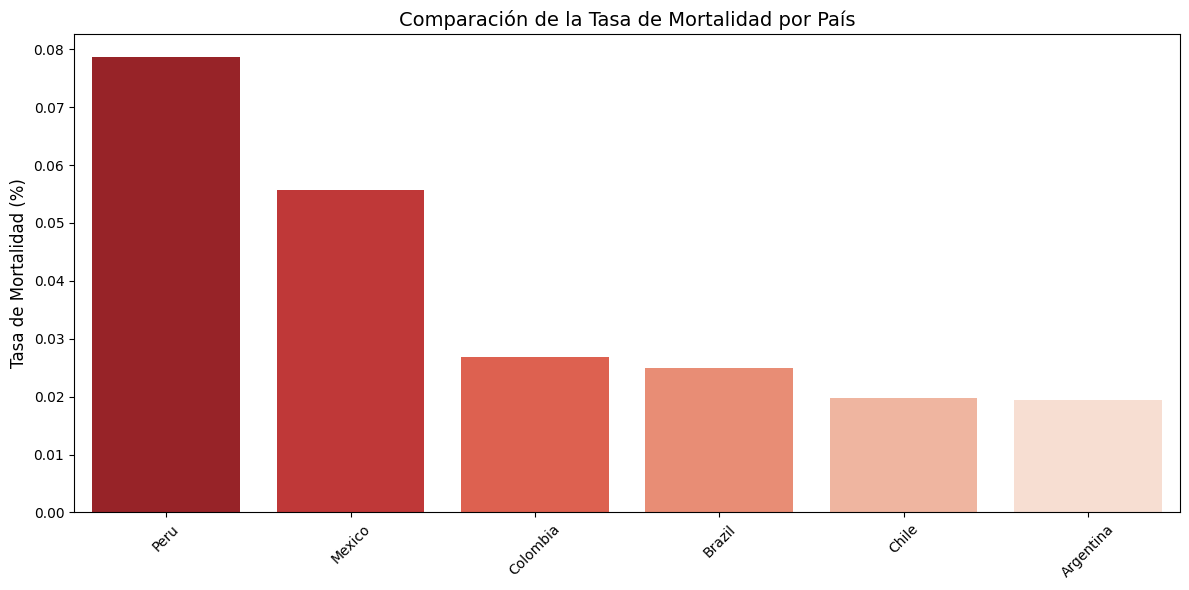

In [57]:
mortality_rate_por_pais = df_limpio.groupby('country_name')['mortality_rate'].mean()

mortality_rate_por_pais = mortality_rate_por_pais.sort_values(ascending=False)
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=mortality_rate_por_pais.index, y=mortality_rate_por_pais.values, palette='Reds_r')

# Configuración del gráfico
plt.title('Comparación de la Tasa de Mortalidad por País', fontsize=14)
plt.ylabel('Tasa de Mortalidad (%)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

EXTRACREDIT: 

Se creo un mapa interactivo utilizando Folium para visualizar la distribución geográfica de tres variables: casos confirmados acumulados, muertes acumuladas y dosis de vacunas administradas acumuladas en diferentes países. El objetivo de este gráfico es proporcionar una representación visual de la distribución geográfica de la pandemia (casos y muertes) y la respuesta de vacunación (dosis administradas) a través de capas de calor en un mapa interactivo.

In [48]:
import folium
from folium.plugins import HeatMap
from folium import LayerControl

In [49]:
columns=['latitude', 'longitude', 'cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered']
data_map= df_limpio[columns].dropna()


map= folium.Map(location=[-14.235004,-51.92527], zoom_start=3)


heat_map_confirmed= HeatMap(data=data_map[['latitude','longitude','cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)

heat_map_deceased= HeatMap(data=data_map[['latitude','longitude','cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

heat_map_vaccine= HeatMap(data=data_map[['latitude','longitude','cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)


map.save('mapa.html')
map